In [1]:
import pandas as pd
import numpy as np
from pandas import to_datetime
from matplotlib import pyplot as plt
import os
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# from pandas.tools.plotting import autocorrelation_plot

# from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
# import pyflux as pf
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [2]:
# Combining all blocks
for num in range(0,112):
    df = pd.read_csv("C:/Users/ABHIMAN/Music/project dataset/input dataset/daily_dataset/block_"+str(num)+".csv")
    df = df[['day','LCLid','energy_sum','energy_mean','energy_min','energy_max']]
    df.reset_index()
    df.to_csv("hc_"+str(num)+".csv")

fout= open("enerrgy.csv","a")
# first file:
for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [3]:
energy = pd.read_csv('enerrgy.csv')
len(energy)

3536007

In [4]:
energy.head(10)

Unnamed: 0         day      LCLid  energy_sum  energy_mean  energy_min  \
0           0  2012-10-12  MAC000002       7.098     0.154304       0.000   
1           1  2012-10-13  MAC000002      11.087     0.230979       0.076   
2           2  2012-10-14  MAC000002      13.223     0.275479       0.070   
3           3  2012-10-15  MAC000002      10.257     0.213688       0.070   
4           4  2012-10-16  MAC000002       9.769     0.203521       0.087   
5           5  2012-10-17  MAC000002      10.885     0.226771       0.067   
6           6  2012-10-18  MAC000002      10.751     0.223979       0.102   
7           7  2012-10-19  MAC000002       8.431     0.175646       0.072   
8           8  2012-10-20  MAC000002      17.378     0.362042       0.073   
9           9  2012-10-21  MAC000002      24.490     0.510208       0.232   

   energy_max  
0       0.886  
1       0.933  
2       1.085  
3       1.164  
4       0.991  
5       0.784  
6       0.897  
7       0.822  
8       1.453  
9       2.160

In [5]:
housecount = energy.groupby('day')[['LCLid']].nunique()
housecount.head(4)

LCLid
day              
2011-11-23     13
2011-11-24     25
2011-11-25     32
2011-11-26     41

<Axes: xlabel='day'>

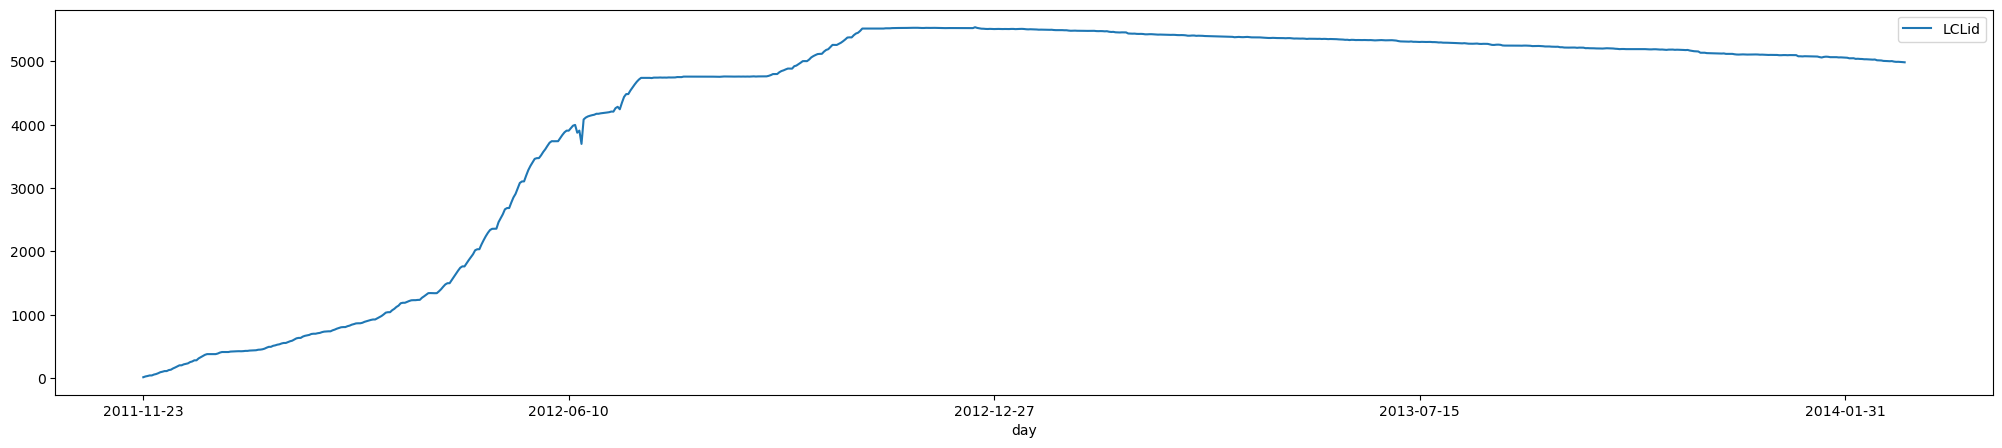

In [6]:
housecount.plot(figsize=(25,5))

In [7]:
energy.dtypes

Unnamed: 0       int64
day             object
LCLid           object
energy_sum     float64
energy_mean    float64
energy_min     float64
energy_max     float64
dtype: object

In [8]:
energy.head()

Unnamed: 0         day      LCLid  energy_sum  energy_mean  energy_min  \
0           0  2012-10-12  MAC000002       7.098     0.154304       0.000   
1           1  2012-10-13  MAC000002      11.087     0.230979       0.076   
2           2  2012-10-14  MAC000002      13.223     0.275479       0.070   
3           3  2012-10-15  MAC000002      10.257     0.213688       0.070   
4           4  2012-10-16  MAC000002       9.769     0.203521       0.087   

   energy_max  
0       0.886  
1       0.933  
2       1.085  
3       1.164  
4       0.991

In [9]:
energy = energy.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount, on = ['day'])
energy = energy.reset_index()

In [10]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [11]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [12]:
print(energy.day.unique())

[datetime.date(2011, 11, 23) datetime.date(2011, 11, 24)
 datetime.date(2011, 11, 25) datetime.date(2011, 11, 26)
 datetime.date(2011, 11, 27) datetime.date(2011, 11, 28)
 datetime.date(2011, 11, 29) datetime.date(2011, 11, 30)
 datetime.date(2011, 12, 1) datetime.date(2011, 12, 2)
 datetime.date(2011, 12, 3) datetime.date(2011, 12, 4)
 datetime.date(2011, 12, 5) datetime.date(2011, 12, 6)
 datetime.date(2011, 12, 7) datetime.date(2011, 12, 8)
 datetime.date(2011, 12, 9) datetime.date(2011, 12, 10)
 datetime.date(2011, 12, 11) datetime.date(2011, 12, 12)
 datetime.date(2011, 12, 13) datetime.date(2011, 12, 14)
 datetime.date(2011, 12, 15) datetime.date(2011, 12, 16)
 datetime.date(2011, 12, 17) datetime.date(2011, 12, 18)
 datetime.date(2011, 12, 19) datetime.date(2011, 12, 20)
 datetime.date(2011, 12, 21) datetime.date(2011, 12, 22)
 datetime.date(2011, 12, 23) datetime.date(2011, 12, 24)
 datetime.date(2011, 12, 25) datetime.date(2011, 12, 26)
 datetime.date(2011, 12, 27) datetime.da

In [13]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [14]:
energy.head(10)

day   energy_sum  LCLid  avg_energy
0  2011-11-23    90.385000     13    6.952692
1  2011-11-24   213.412000     25    8.536480
2  2011-11-25   303.993000     32    9.499781
3  2011-11-26   420.976000     41   10.267707
4  2011-11-27   444.883001     41   10.850805
5  2011-11-28   500.686000     55    9.103382
6  2011-11-29   584.317000     63    9.274873
7  2011-11-30   669.827000     76    8.813513
8  2011-12-01   848.949001     92    9.227707
9  2011-12-02  1014.591001    100   10.145910

In [15]:
energy.dtypes

day            object
energy_sum    float64
LCLid           int64
avg_energy    float64
dtype: object

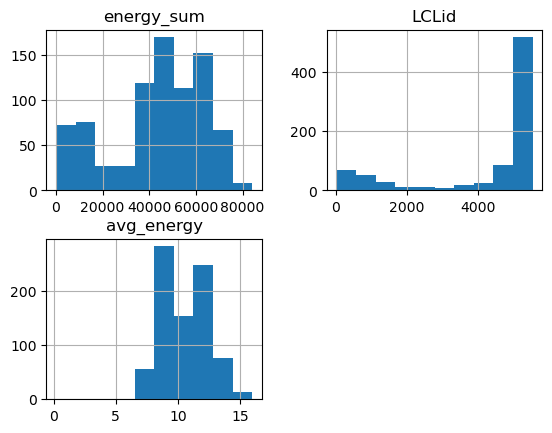

In [16]:
energy.hist()
plt.show()


In [17]:
energy['LCLid'].value_counts()

LCLid
4761    15
5528    10
5530     9
5513     7
5527     7
        ..
3740     1
3717     1
3668     1
3615     1
4987     1
Name: count, Length: 510, dtype: int64

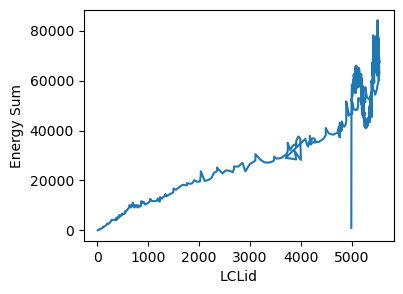

In [18]:
plt.figure(figsize=(4,3))
plt.plot(energy.LCLid,energy.energy_sum)
plt.ylabel('Energy Sum')
plt.xlabel('LCLid')
plt.show()

In [19]:
energy.describe()

energy_sum        LCLid  avg_energy
count    829.000000   829.000000  829.000000
mean   43535.325676  4234.539204   10.491862
std    20550.594031  1789.994799    1.902513
min       90.385000    13.000000    0.211766
25%    34665.436002  4084.000000    8.676955
50%    46641.160997  5138.000000   10.516983
75%    59755.616996  5369.000000   12.000690
max    84156.135002  5541.000000   15.964434

In [20]:
energy.describe(include='all')

day    energy_sum        LCLid  avg_energy
count          829    829.000000   829.000000  829.000000
unique         829           NaN          NaN         NaN
top     2011-11-23           NaN          NaN         NaN
freq             1           NaN          NaN         NaN
mean           NaN  43535.325676  4234.539204   10.491862
std            NaN  20550.594031  1789.994799    1.902513
min            NaN     90.385000    13.000000    0.211766
25%            NaN  34665.436002  4084.000000    8.676955
50%            NaN  46641.160997  5138.000000   10.516983
75%            NaN  59755.616996  5369.000000   12.000690
max            NaN  84156.135002  5541.000000   15.964434

In [21]:
weather = pd.read_csv("C:/Users/ABHIMAN/Music/project dataset/input dataset/weather_daily_darksky.csv")
weather.head()

temperatureMax   temperatureMaxTime  windBearing                 icon  \
0           11.96  2011-11-11 23:00:00          123                  fog   
1            8.59  2011-12-11 14:00:00          198    partly-cloudy-day   
2           10.33  2011-12-27 02:00:00          225    partly-cloudy-day   
3            8.07  2011-12-02 23:00:00          232                 wind   
4            8.22  2011-12-24 23:00:00          252  partly-cloudy-night   

   dewPoint   temperatureMinTime  cloudCover  windSpeed  pressure  \
0      9.40  2011-11-11 07:00:00        0.79       3.88   1016.08   
1      4.49  2011-12-11 01:00:00        0.56       3.94   1007.71   
2      5.47  2011-12-27 23:00:00        0.85       3.54   1032.76   
3      3.69  2011-12-02 07:00:00        0.32       3.00   1012.12   
4      2.79  2011-12-24 07:00:00        0.37       4.46   1028.17   

  apparentTemperatureMinTime  ...  temperatureHigh          sunriseTime  \
0        2011-11-11 07:00:00  ...            10.87  2011-11-11 07:12:14   
1        2011-12-11 02:00:00  ...             8.59  2011-12-11 07:57:02   
2        2011-12-27 22:00:00  ...            10.33  2011-12-27 08:07:06   
3        2011-12-02 07:00:00  ...             7.36  2011-12-02 07:46:09   
4        2011-12-24 07:00:00  ...             7.93  2011-12-24 08:06:15   

   temperatureHighTime          uvIndexTime  \
0  2011-11-11 19:00:00  2011-11-11 11:00:00   
1  2011-12-11 14:00:00  2011-12-11 12:00:00   
2  2011-12-27 14:00:00  2011-12-27 00:00:00   
3  2011-12-02 12:00:00  2011-12-02 10:00:00   
4  2011-12-24 15:00:00  2011-12-24 13:00:00   

                                             summary   temperatureLowTime  \
0                             Foggy until afternoon.  2011-11-11 19:00:00   
1                  Partly cloudy throughout the day.  2011-12-12 07:00:00   
2                  Mostly cloudy throughout the day.  2011-12-27 23:00:00   
3  Partly cloudy throughout the day and breezy ov...  2011-12-02 19:00:00   
4                  Mostly cloudy throughout the day.  2011-12-24 19:00:00   

   apparentTemperatureMin  apparentTemperatureMaxTime  \
0                    6.48         2011-11-11 23:00:00   
1                    0.11         2011-12-11 20:00:00   
2                    5.59         2011-12-27 02:00:00   
3                    0.46         2011-12-02 12:00:00   
4                   -0.51         2011-12-24 23:00:00   

  apparentTemperatureLowTime moonPhase  
0        2011-11-11 19:00:00      0.52  
1        2011-12-12 08:00:00      0.53  
2        2011-12-28 00:00:00      0.10  
3        2011-12-02 19:00:00      0.25  
4        2011-12-24 20:00:00      0.99  

[5 rows x 32 columns]

In [22]:
weather.dtypes

temperatureMax                 float64
temperatureMaxTime              object
windBearing                      int64
icon                            object
dewPoint                       float64
temperatureMinTime              object
cloudCover                     float64
windSpeed                      float64
pressure                       float64
apparentTemperatureMinTime      object
apparentTemperatureHigh        float64
precipType                      object
visibility                     float64
humidity                       float64
apparentTemperatureHighTime     object
apparentTemperatureLow         float64
apparentTemperatureMax         float64
uvIndex                        float64
time                            object
sunsetTime                      object
temperatureLow                 float64
temperatureMin                 float64
temperatureHigh                float64
sunriseTime                     object
temperatureHighTime             object
uvIndexTime              

In [23]:
weather.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime',
       'moonPhase'],
      dtype='object')

In [24]:
weather.describe()

temperatureMax  windBearing    dewPoint  cloudCover   windSpeed  \
count      882.000000   882.000000  882.000000  881.000000  882.000000   
mean        13.660113   195.702948    6.530034    0.477605    3.581803   
std          6.182744    89.340783    4.830875    0.193514    1.694007   
min         -0.060000     0.000000   -7.840000    0.000000    0.200000   
25%          9.502500   120.500000    3.180000    0.350000    2.370000   
50%         12.625000   219.000000    6.380000    0.470000    3.440000   
75%         17.920000   255.000000   10.057500    0.600000    4.577500   
max         32.400000   359.000000   17.770000    1.000000    9.960000   

          pressure  apparentTemperatureHigh  visibility    humidity  \
count   882.000000               882.000000  882.000000  882.000000   
mean   1014.127540                12.723866   11.167143    0.781871   
std      11.073038                 7.279168    2.466109    0.095348   
min     979.250000                -6.460000    1.480000    0.430000   
25%    1007.435000                 7.032500   10.327500    0.720000   
50%    1014.615000                12.470000   11.970000    0.790000   
75%    1021.755000                17.910000   12.830000    0.860000   
max    1040.920000                32.420000   15.340000    0.980000   

       apparentTemperatureLow  apparentTemperatureMax     uvIndex  \
count              882.000000              882.000000  881.000000   
mean                 6.085045               12.929467    2.542565   
std                  6.031967                7.105426    1.832985   
min                 -8.880000               -4.110000    0.000000   
25%                  1.522500                7.332500    1.000000   
50%                  5.315000               12.625000    2.000000   
75%                 11.467500               17.920000    4.000000   
max                 20.540000               32.420000    7.000000   

       temperatureLow  temperatureMin  temperatureHigh  \
count      882.000000      882.000000       882.000000   
mean         7.709841        7.414161        13.542392   
std          4.871004        4.888852         6.260196   
min         -5.640000       -5.640000        -0.810000   
25%          3.990000        3.705000         9.212500   
50%          7.540000        7.100000        12.470000   
75%         11.467500       11.277500        17.910000   
max         20.540000       20.540000        32.400000   

       apparentTemperatureMin   moonPhase  
count              882.000000  882.000000  
mean                 5.738039    0.500930  
std                  6.048746    0.287022  
min                 -8.880000    0.000000  
25%                  1.105000    0.260000  
50%                  4.885000    0.500000  
75%                 11.277500    0.750000  
max                 20.540000    0.990000

In [25]:
weather['day']=  pd.to_datetime(weather['time']) # day is given as timestamp
weather['day']=  pd.to_datetime(weather['day'],format='%Y%m%d').dt.date
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','day']]
weather = weather.dropna()

In [26]:
                           # RELATIONSHIP OF WEATHER CONDITION WITH ELECTRICITY CONSUMPTION #
weather_energy =  energy.merge(weather,on='day')
weather_energy.head(10)

day   energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
0  2011-11-23    90.385000     13    6.952692           10.36          229   
1  2011-11-24   213.412000     25    8.536480           12.93          204   
2  2011-11-25   303.993000     32    9.499781           13.03          243   
3  2011-11-26   420.976000     41   10.267707           12.96          237   
4  2011-11-27   444.883001     41   10.850805           13.54          256   
5  2011-11-28   500.686000     55    9.103382           12.58          190   
6  2011-11-29   584.317000     63    9.274873           13.47          213   
7  2011-11-30   669.827000     76    8.813513           11.87          205   
8  2011-12-01   848.949001     92    9.227707           12.15          225   
9  2011-12-02  1014.591001    100   10.145910            8.07          232   

   dewPoint  cloudCover  windSpeed  pressure  ...  visibility  humidity  \
0      6.29        0.36       2.04   1027.12  ...        8.06      0.93   
1      8.56        0.41       4.04   1027.22  ...       10.64      0.89   
2      7.24        0.48       5.02   1024.47  ...       12.38      0.79   
3      6.96        0.44       5.75   1025.80  ...       13.07      0.81   
4      5.76        0.42       5.48   1021.11  ...       13.08      0.72   
5      4.39        0.56       2.34   1022.80  ...       11.84      0.86   
6      8.61        0.60       6.48   1009.70  ...       12.57      0.82   
7      5.26        0.31       4.43   1019.43  ...       13.05      0.78   
8      6.87        0.57       2.57   1007.12  ...       12.15      0.82   
9      3.69        0.32       3.00   1012.12  ...       11.89      0.87   

   apparentTemperatureLow  apparentTemperatureMax  uvIndex  temperatureLow  \
0                    6.56                   10.36      1.0            8.24   
1                    7.30                   12.93      1.0            9.71   
2                    4.69                   13.03      1.0            7.01   
3                   11.59                   12.96      1.0           11.59   
4                    1.31                   13.54      1.0            1.31   
5                   10.27                   12.58      1.0           10.27   
6                    3.34                   13.47      1.0            6.34   
7                    6.23                   11.87      1.0            9.44   
8                    0.46                   12.15      1.0            2.56   
9                    3.26                    5.33      1.0            6.33   

   temperatureMin  temperatureHigh  apparentTemperatureMin  moonPhase  
0            3.81            10.36                    2.18       0.94  
1            8.56            12.93                    7.01       0.97  
2            7.46            12.27                    4.84       0.01  
3            7.01            12.96                    4.69       0.05  
4            4.47            13.54                    2.94       0.08  
5            1.31            10.27                    1.31       0.12  
6            6.37            13.47                    3.39       0.15  
7            6.34            11.87                    3.34       0.19  
8            6.08            12.15                    5.29       0.22  
9            2.56             7.36                    0.46       0.25  

[10 rows x 21 columns]

In [27]:
weather_energy.dtypes

day                         object
energy_sum                 float64
LCLid                        int64
avg_energy                 float64
temperatureMax             float64
windBearing                  int64
dewPoint                   float64
cloudCover                 float64
windSpeed                  float64
pressure                   float64
apparentTemperatureHigh    float64
visibility                 float64
humidity                   float64
apparentTemperatureLow     float64
apparentTemperatureMax     float64
uvIndex                    float64
temperatureLow             float64
temperatureMin             float64
temperatureHigh            float64
apparentTemperatureMin     float64
moonPhase                  float64
dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


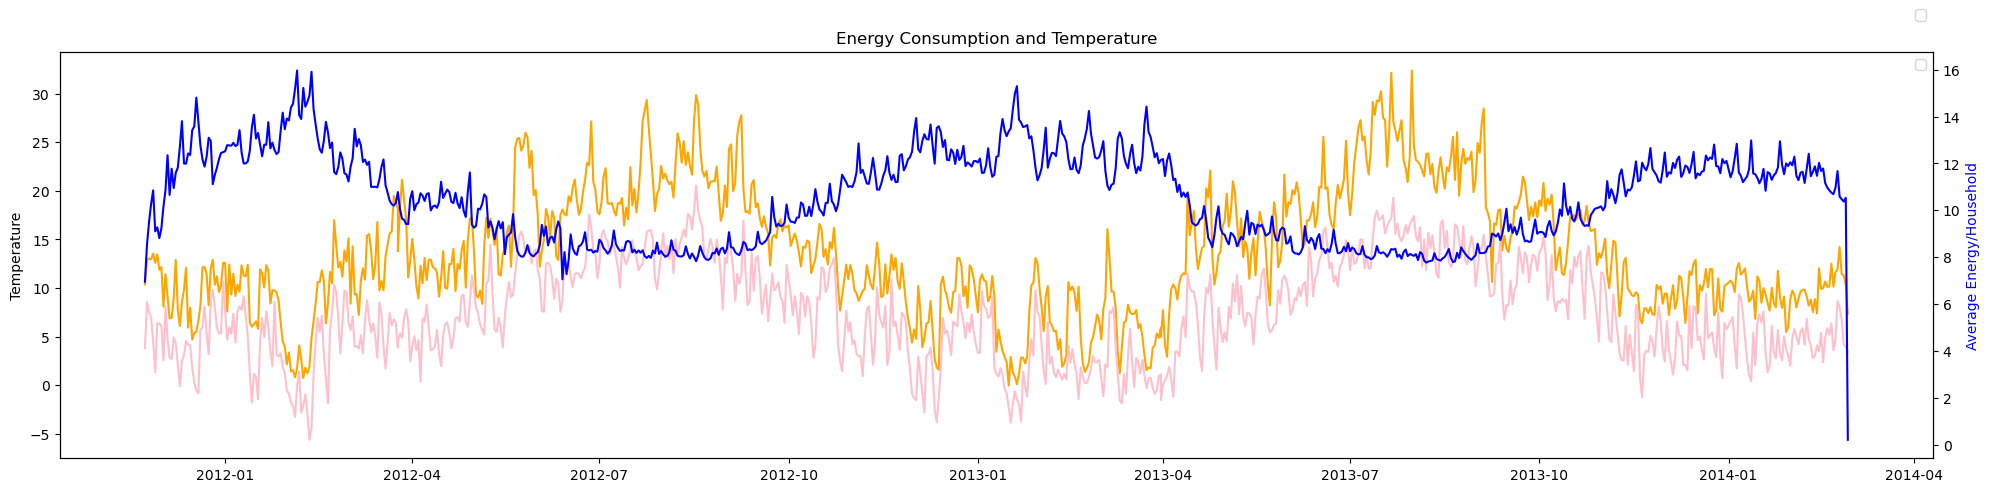

In [28]:
                            # ENERGY VS TEMPERATURE #
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.temperatureMax, color = 'orange')
ax1.plot(weather_energy.day, weather_energy.temperatureMin, color = 'pink')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

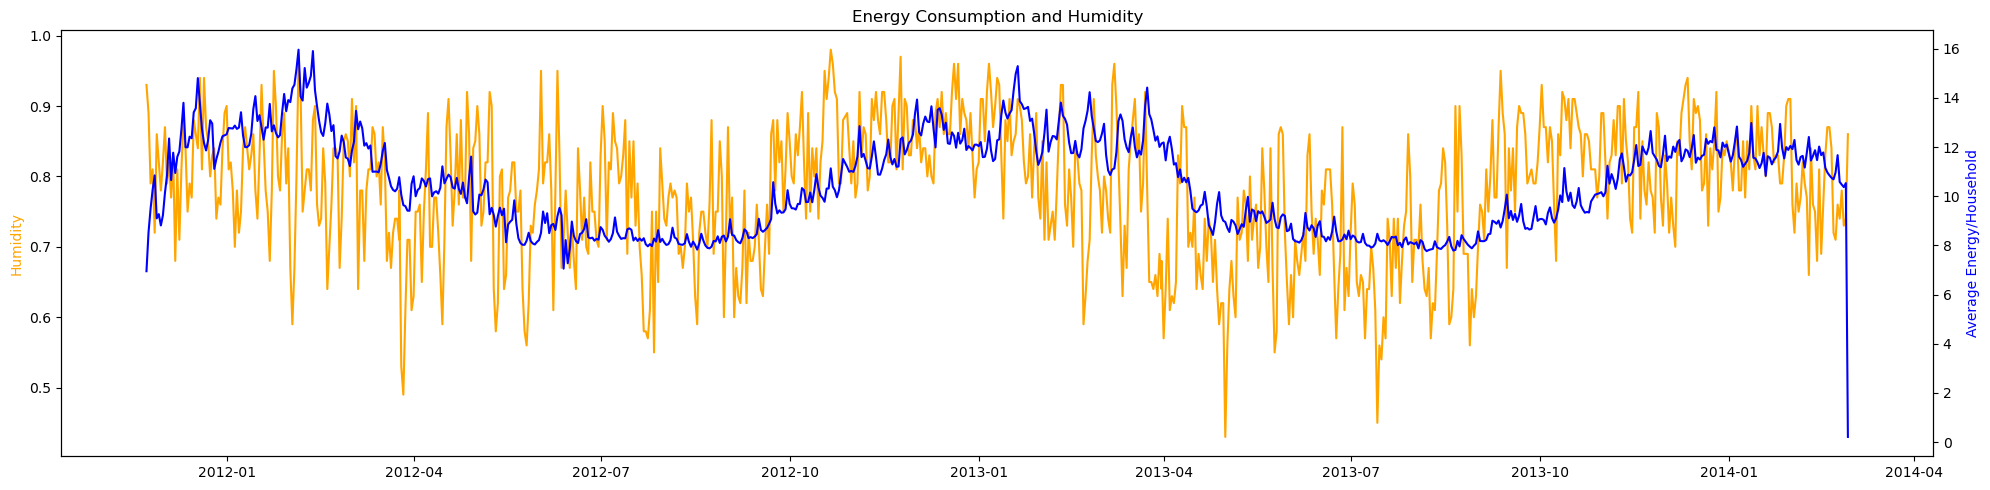

In [29]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.humidity, color = 'orange')
ax1.set_ylabel('Humidity',color = 'orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
plt.title('Energy Consumption and Humidity')
fig.tight_layout()
plt.show()

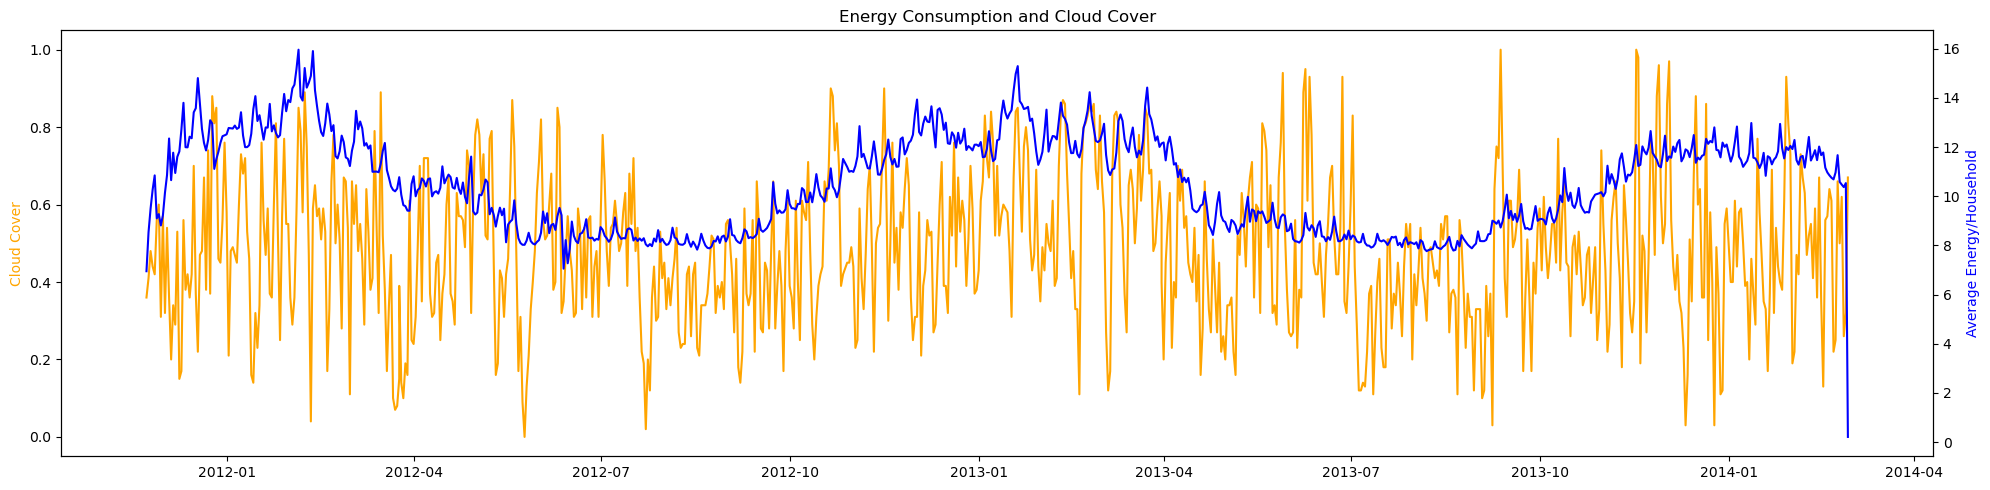

In [30]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.cloudCover, color = 'orange')
ax1.set_ylabel('Cloud Cover',color = 'orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
plt.title('Energy Consumption and Cloud Cover')
fig.tight_layout()
plt.show()

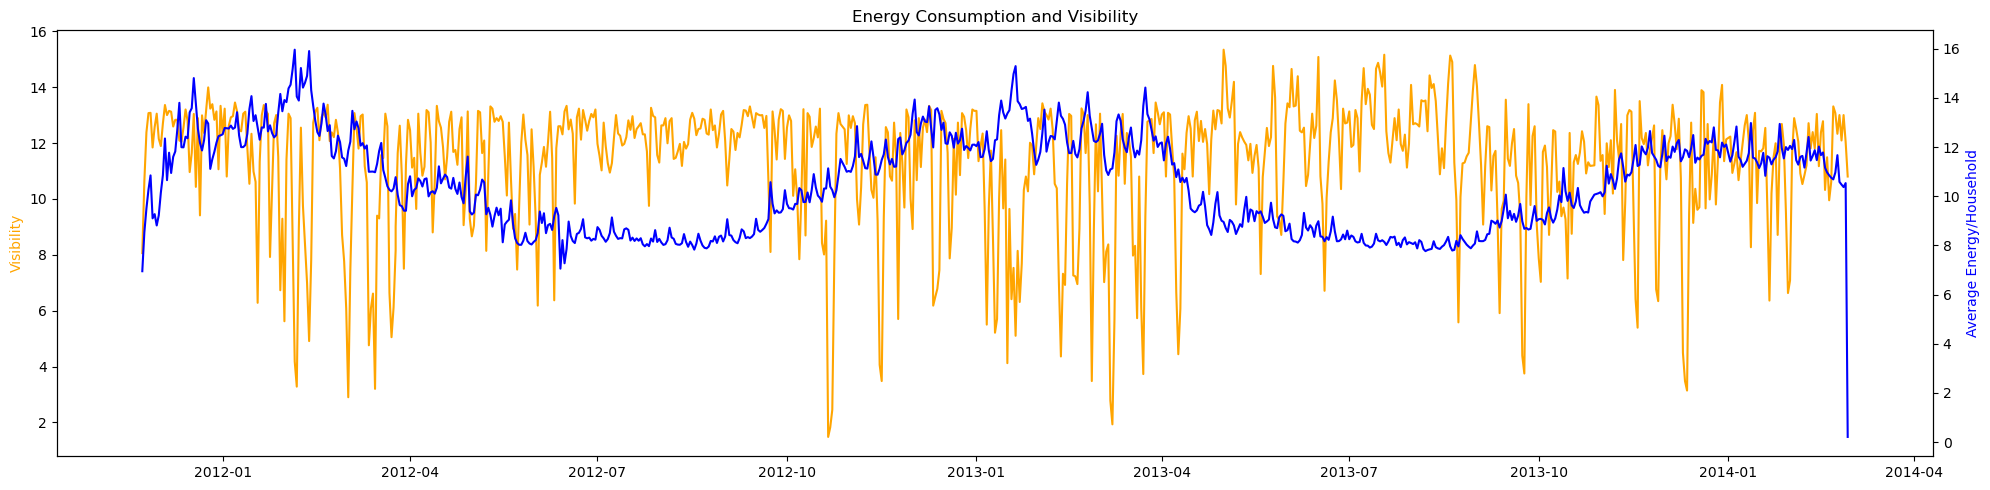

In [31]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.visibility, color = 'orange')
ax1.set_ylabel('Visibility',color = 'orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
plt.title('Energy Consumption and Visibility')
fig.tight_layout()
plt.show()

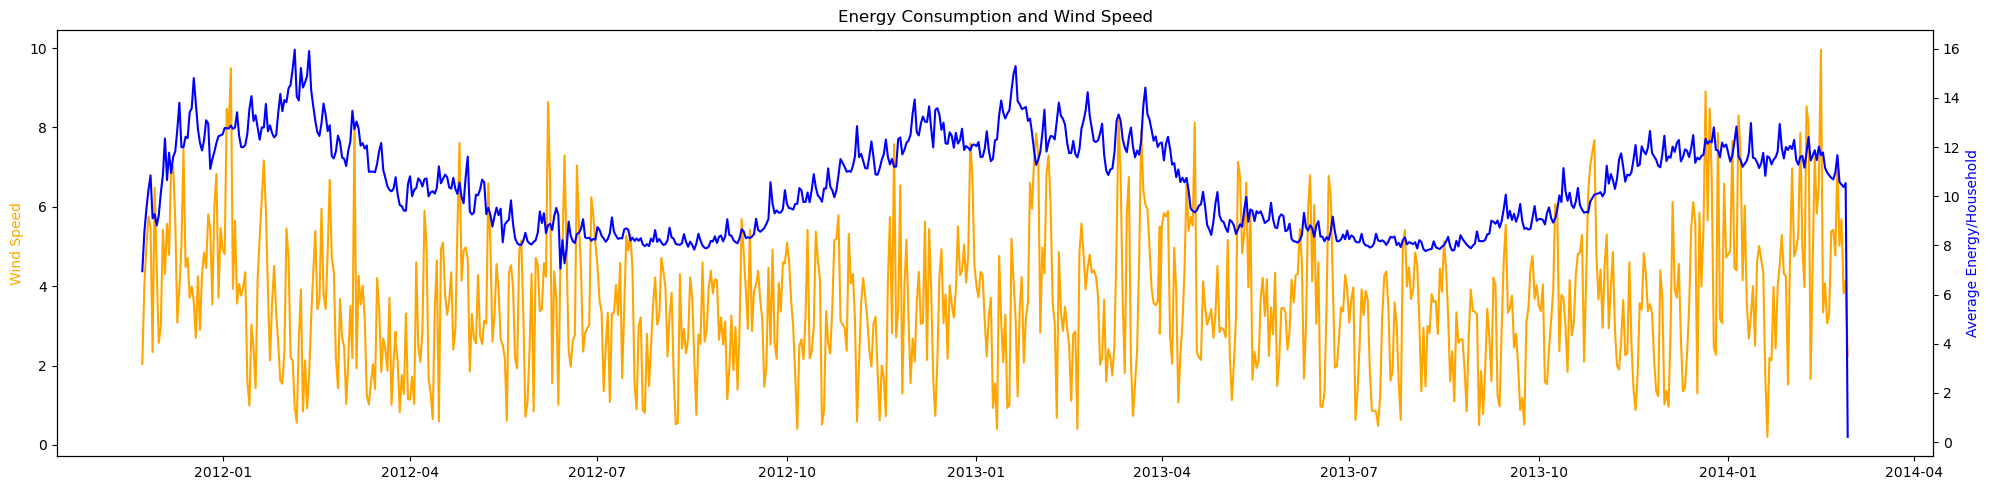

In [32]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.windSpeed, color = 'orange')
ax1.set_ylabel('Wind Speed',color = 'orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
plt.title('Energy Consumption and Wind Speed')
fig.tight_layout()
plt.show()

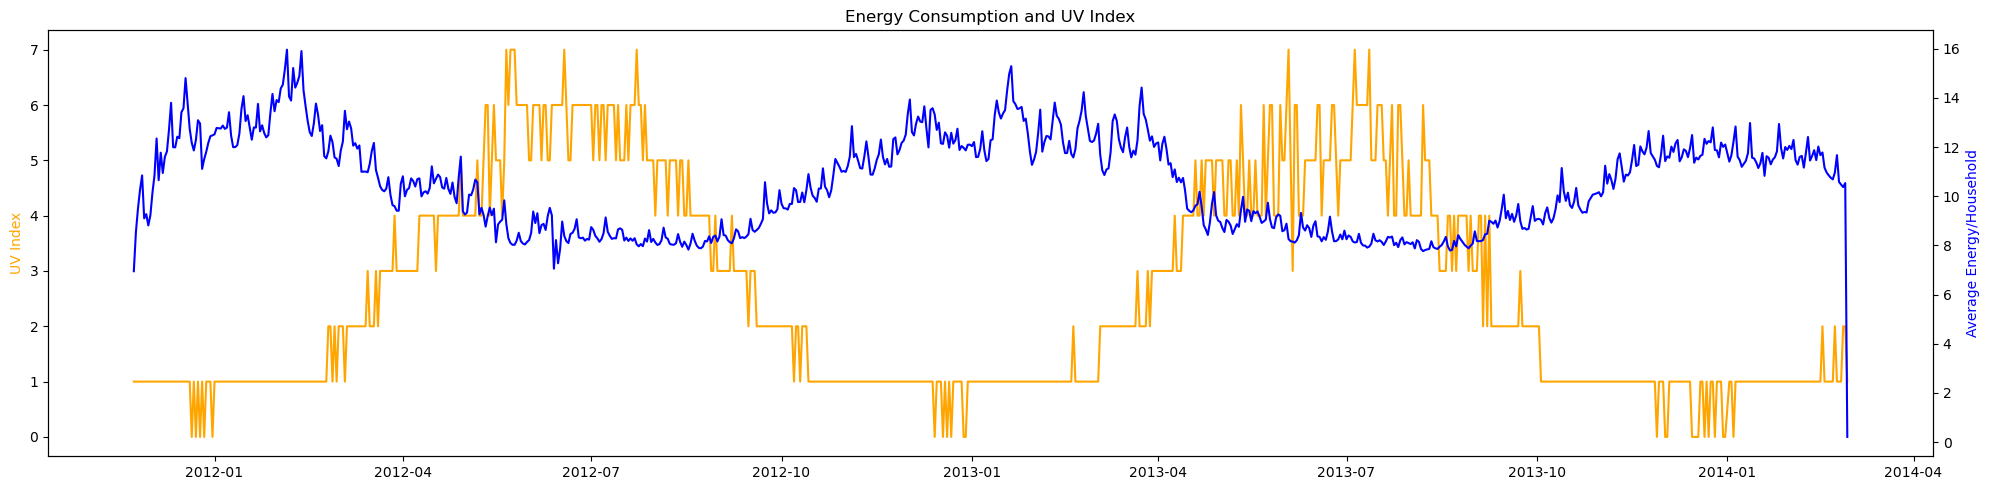

In [33]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.uvIndex, color = 'orange')
ax1.set_ylabel('UV Index',color = 'orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
plt.show()

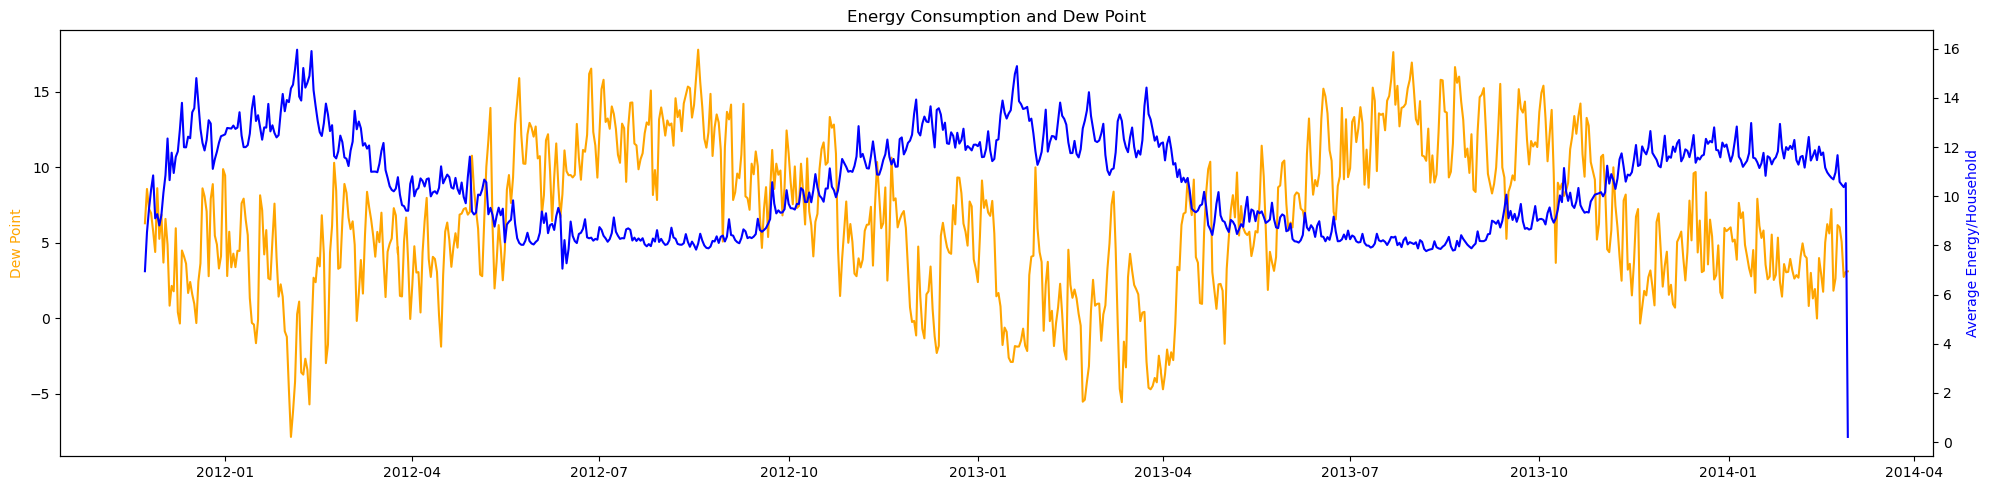

In [34]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.dewPoint, color = 'orange')
ax1.set_ylabel('Dew Point',color = 'orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.avg_energy,color = 'blue')
ax2.set_ylabel('Average Energy/Household',color = 'blue')
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
plt.show()

In [35]:
weather_energy.head()

day  energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
0  2011-11-23   90.385000     13    6.952692           10.36          229   
1  2011-11-24  213.412000     25    8.536480           12.93          204   
2  2011-11-25  303.993000     32    9.499781           13.03          243   
3  2011-11-26  420.976000     41   10.267707           12.96          237   
4  2011-11-27  444.883001     41   10.850805           13.54          256   

   dewPoint  cloudCover  windSpeed  pressure  ...  visibility  humidity  \
0      6.29        0.36       2.04   1027.12  ...        8.06      0.93   
1      8.56        0.41       4.04   1027.22  ...       10.64      0.89   
2      7.24        0.48       5.02   1024.47  ...       12.38      0.79   
3      6.96        0.44       5.75   1025.80  ...       13.07      0.81   
4      5.76        0.42       5.48   1021.11  ...       13.08      0.72   

   apparentTemperatureLow  apparentTemperatureMax  uvIndex  temperatureLow  \
0                    6.56                   10.36      1.0            8.24   
1                    7.30                   12.93      1.0            9.71   
2                    4.69                   13.03      1.0            7.01   
3                   11.59                   12.96      1.0           11.59   
4                    1.31                   13.54      1.0            1.31   

   temperatureMin  temperatureHigh  apparentTemperatureMin  moonPhase  
0            3.81            10.36                    2.18       0.94  
1            8.56            12.93                    7.01       0.97  
2            7.46            12.27                    4.84       0.01  
3            7.01            12.96                    4.69       0.05  
4            4.47            13.54                    2.94       0.08  

[5 rows x 21 columns]

In [36]:
weather_matrix = weather_energy[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']]
weather_matrix.head()

avg_energy  temperatureMax  dewPoint  cloudCover  windSpeed  pressure  \
0    6.952692           10.36      6.29        0.36       2.04   1027.12   
1    8.536480           12.93      8.56        0.41       4.04   1027.22   
2    9.499781           13.03      7.24        0.48       5.02   1024.47   
3   10.267707           12.96      6.96        0.44       5.75   1025.80   
4   10.850805           13.54      5.76        0.42       5.48   1021.11   

   visibility  humidity  uvIndex  moonPhase  
0        8.06      0.93      1.0       0.94  
1       10.64      0.89      1.0       0.97  
2       12.38      0.79      1.0       0.01  
3       13.07      0.81      1.0       0.05  
4       13.08      0.72      1.0       0.08

In [37]:
weather_matrix.dtypes

avg_energy        float64
temperatureMax    float64
dewPoint          float64
cloudCover        float64
windSpeed         float64
pressure          float64
visibility        float64
humidity          float64
uvIndex           float64
moonPhase         float64
dtype: object

In [38]:
cor_matrix = weather_energy[['avg_energy','temperatureMax','dewPoint', 'cloudCover', 'windSpeed','pressure', 'visibility', 'humidity','uvIndex', 'moonPhase']].corr()
cor_matrix

avg_energy  temperatureMax  dewPoint  cloudCover  windSpeed  \
avg_energy        1.000000       -0.846965 -0.755901    0.241779   0.149624   
temperatureMax   -0.846965        1.000000  0.865038   -0.333409  -0.153602   
dewPoint         -0.755901        0.865038  1.000000   -0.025207  -0.092212   
cloudCover        0.241779       -0.333409 -0.025207    1.000000   0.170235   
windSpeed         0.149624       -0.153602 -0.092212    0.170235   1.000000   
pressure         -0.028851        0.118933 -0.028121   -0.101079  -0.344354   
visibility       -0.246404        0.259108  0.042633   -0.330177   0.281088   
humidity          0.361237       -0.404899  0.055514    0.480056  -0.042391   
uvIndex          -0.733171        0.696497  0.486692   -0.248695  -0.152634   
moonPhase        -0.031716        0.003636 -0.008239   -0.062126  -0.023273   

                pressure  visibility  humidity   uvIndex  moonPhase  
avg_energy     -0.028851   -0.246404  0.361237 -0.733171  -0.031716  
temperatureMax  0.118933    0.259108 -0.404899  0.696497   0.003636  
dewPoint       -0.028121    0.042633  0.055514  0.486692  -0.008239  
cloudCover     -0.101079   -0.330177  0.480056 -0.248695  -0.062126  
windSpeed      -0.344354    0.281088 -0.042391 -0.152634  -0.023273  
pressure        1.000000   -0.012508 -0.250941  0.100774   0.038462  
visibility     -0.012508    1.000000 -0.578130  0.240485   0.062813  
humidity       -0.250941   -0.578130  1.000000 -0.533919  -0.013997  
uvIndex         0.100774    0.240485 -0.533919  1.000000   0.012833  
moonPhase       0.038462    0.062813 -0.013997  0.012833   1.000000

In [39]:
from sklearn.preprocessing import MinMaxScaler
X = weather_matrix.values[:,1:]
Y = np.nan_to_num(X)
Clustered_dataset = MinMaxScaler().fit_transform(X)
Clustered_dataset

array([[0.32101047, 0.5517376 , 0.36      , ..., 0.90909091, 0.14285714,
        0.94949495],
       [0.40018484, 0.64037485, 0.41      , ..., 0.83636364, 0.14285714,
        0.97979798],
       [0.40326556, 0.58883249, 0.48      , ..., 0.65454545, 0.14285714,
        0.01010101],
       ...,
       [0.34966112, 0.41311988, 0.26      , ..., 0.54545455, 0.28571429,
        0.90909091],
       [0.31947012, 0.42639594, 0.32      , ..., 0.56363636, 0.28571429,
        0.93939394],
       [0.22828096, 0.42756736, 0.67      , ..., 0.78181818, 0.14285714,
        0.97979798]])

In [40]:
K=range(1,10)   # Here K denotes the provisional cluster numbers taken under consideration
inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40, n_init=10).fit(X)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[165172.0619280193, 100120.99391328514, 68376.787911364, 53711.03405660124, 45039.43874449983, 39463.73857245002, 35138.272593831876, 32819.540718276075, 30725.59861847802]


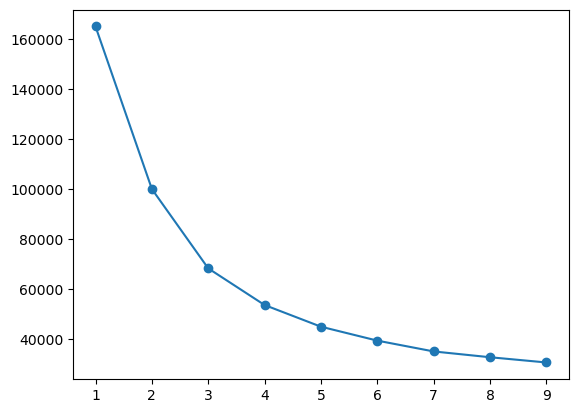

In [41]:
plt.plot(K,inertia, marker='o')
plt.show()


In [42]:
scaler = MinMaxScaler()

In [43]:
weather_scaled = scaler.fit_transform(weather_energy[['temperatureMax','humidity','windSpeed']])
weather_scaled

array([[0.32101047, 0.90909091, 0.18852459],
       [0.40018484, 0.83636364, 0.39344262],
       [0.40326556, 0.65454545, 0.49385246],
       ...,
       [0.34966112, 0.54545455, 0.37090164],
       [0.31947012, 0.56363636, 0.40368852],
       [0.22828096, 0.78181818, 0.20901639]])

In [44]:
kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
weather_energy['weather_cluster'] = kmeans.labels_

D:\anaconda_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


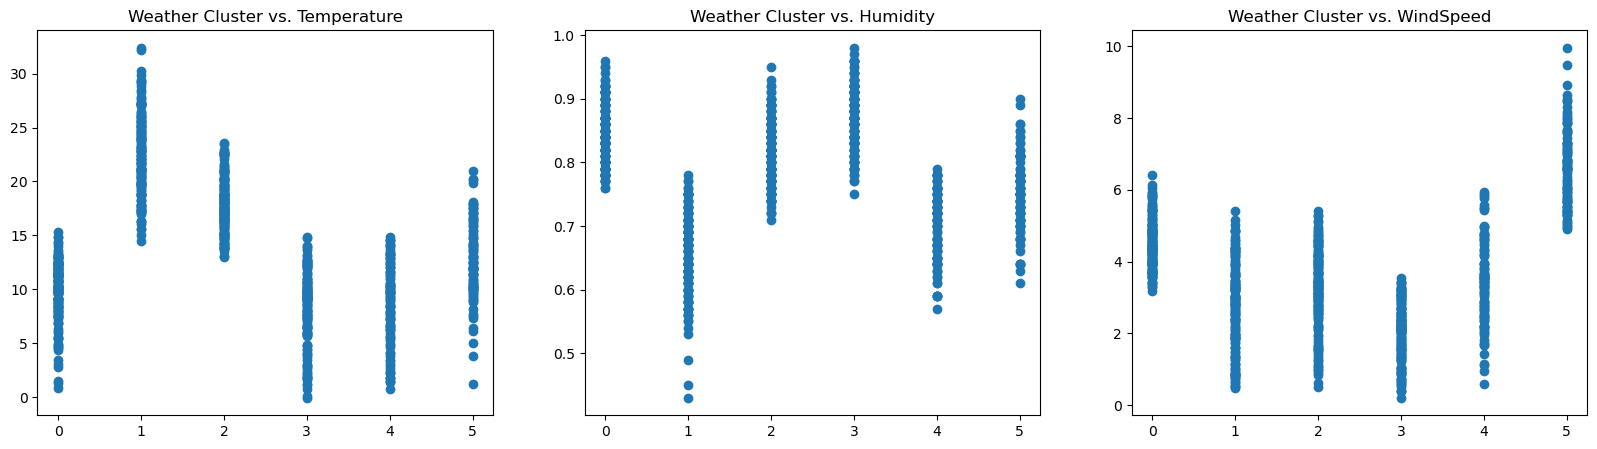

In [45]:
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(weather_energy.weather_cluster,weather_energy.temperatureMax)
plt.title('Weather Cluster vs. Temperature')
plt.subplot(1, 3, 2)
plt.scatter(weather_energy.weather_cluster,weather_energy.humidity)
plt.title('Weather Cluster vs. Humidity')
plt.subplot(1, 3, 3)
plt.scatter(weather_energy.weather_cluster,weather_energy.windSpeed)
plt.title('Weather Cluster vs. WindSpeed')

plt.show()

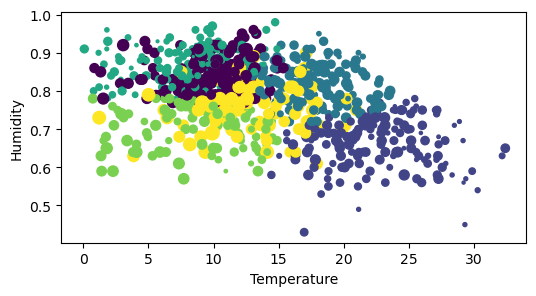

In [46]:
fig, ax1 = plt.subplots(figsize = (6,3))
ax1.scatter(weather_energy.temperatureMax, 
            weather_energy.humidity, 
            s = weather_energy.windSpeed*10,
            c = weather_energy.weather_cluster)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Humidity')
plt.show()

In [47]:
clusterNum = 6
k_means = KMeans(init="k-means++",n_clusters = clusterNum, n_init=12)
k_means.fit(Y)
labels = k_means.labels_
print(labels)

[1 1 1 1 0 1 3 0 3 0 3 3 3 3 3 3 0 0 3 3 4 4 4 4 3 0 0 0 0 1 0 1 1 1 1 0 0
 0 3 3 3 3 0 3 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 3 0 0 0 0 3 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 5 1 1 1 1 5 1 1 1 0 0 0 1 0 1 1 1 1 1
 1 1 5 0 0 0 1 1 1 1 5 5 1 1 1 1 5 5 0 0 3 3 3 0 0 0 3 4 4 4 3 3 3 0 1 3 4
 4 4 4 3 4 4 4 4 3 0 3 2 2 5 3 3 3 0 2 2 2 2 5 1 1 0 0 1 0 3 2 3 2 2 5 5 5
 5 5 5 5 5 5 5 2 3 2 2 2 4 4 2 2 3 3 2 2 2 2 2 5 5 5 2 2 5 2 5 5 5 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 2 2 2 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 5
 5 5 5 5 2 2 2 2 2 2 2 2 5 5 5 2 2 2 2 2 2 2 2 1 5 5 5 5 5 5 5 5 2 2 2 2 5
 2 5 2 2 2 5 5 2 0 3 4 4 4 2 2 5 5 2 2 3 3 2 2 5 2 2 0 3 3 3 3 3 3 4 3 3 2
 0 5 5 5 2 0 0 0 3 3 4 4 4 4 4 3 0 1 0 3 4 0 0 5 1 1 0 3 0 3 3 3 3 3 3 3 4
 3 0 0 0 0 0 3 3 3 0 3 0 0 0 1 0 3 4 4 4 3 0 0 3 3 3 3 4 4 3 3 0 3 3 3 0 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 3 4 4 4 3 3 0 0 3 4 3 3 3 0 3 0 0 0 4 3 0 0
 0 4 4 0 0 3 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 3 3 4 4 3 3 0 0 0 0 3 4 4
 4 4 3 0 0 0 0 0 0 0 0 0 

In [48]:
weather_matrix["Clus-data"] = labels
weather_matrix.head()

C:\Users\ABHIMAN\AppData\Local\Temp\ipykernel_404\2207410829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_matrix["Clus-data"] = labels


avg_energy  temperatureMax  dewPoint  cloudCover  windSpeed  pressure  \
0    6.952692           10.36      6.29        0.36       2.04   1027.12   
1    8.536480           12.93      8.56        0.41       4.04   1027.22   
2    9.499781           13.03      7.24        0.48       5.02   1024.47   
3   10.267707           12.96      6.96        0.44       5.75   1025.80   
4   10.850805           13.54      5.76        0.42       5.48   1021.11   

   visibility  humidity  uvIndex  moonPhase  Clus-data  
0        8.06      0.93      1.0       0.94          1  
1       10.64      0.89      1.0       0.97          1  
2       12.38      0.79      1.0       0.01          1  
3       13.07      0.81      1.0       0.05          1  
4       13.08      0.72      1.0       0.08          0

In [49]:
weather_matrix["Clus-data"].value_counts()

Clus-data
2    166
0    154
3    150
5    141
1    125
4     92
Name: count, dtype: int64

In [50]:
weather_matrix.groupby("Clus-data").mean()

avg_energy  temperatureMax   dewPoint  cloudCover  windSpeed  \
Clus-data                                                                 
0           11.763862        8.502013   2.023312    0.493182   3.828247   
1           11.978349        9.657760   3.241280    0.509840   2.924480   
2            8.726382       19.364398  11.726325    0.482470   3.619217   
3           11.149339       10.863533   5.228800    0.511000   4.115200   
4           11.363877       10.211087   4.927826    0.522391   4.597283   
5            8.582705       21.488369  10.764681    0.373475   2.739504   

              pressure  visibility  humidity   uvIndex  moonPhase  
Clus-data                                                          
0          1016.585844   11.392662  0.774675  1.779221   0.509740  
1          1029.569280   10.535440  0.793200  1.464000   0.523920  
2          1011.488133   11.468253  0.781687  4.036145   0.532530  
3          1006.357200   11.231067  0.818867  1.740000   0.494733  
4           993.431522   10.935761  0.827174  1.586957   0.449022  
5          1022.233759   11.980071  0.702553  4.340426   0.476879

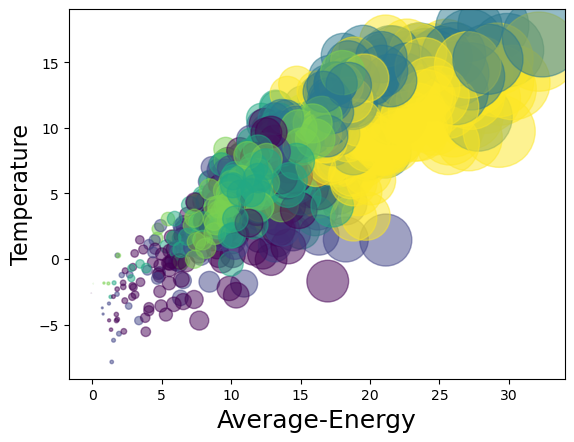

In [51]:
area = np.pi*(Y[:,0])**2
plt.scatter(Y[:,0],Y[:,1],s=area,c=labels.astype(float),alpha=0.5)
plt.xlabel('Average-Energy',fontsize=18)
plt.ylabel('Temperature',fontsize=16)
plt.show()

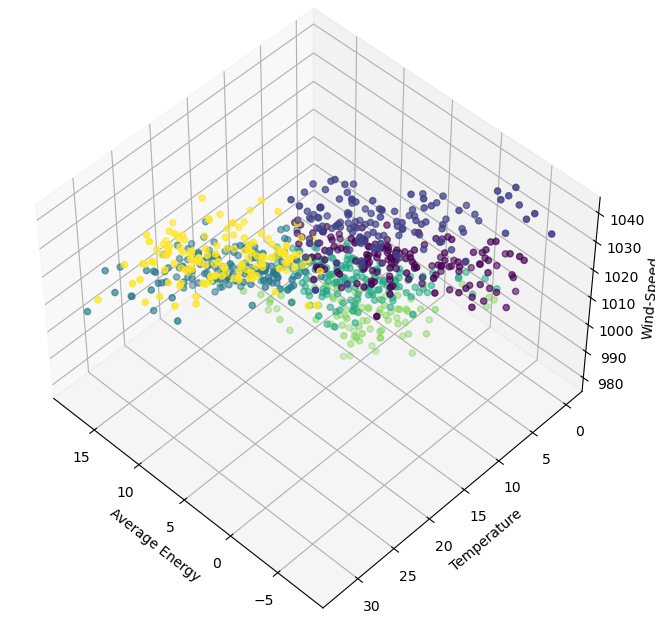

In [52]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect = [0,0,.95,1], elev=48,azim=134,auto_add_to_figure=False)
fig.add_axes(ax)
plt.cla()

ax.set_xlabel('Average Energy')
ax.set_ylabel('Temperature')
ax.set_zlabel('Wind-Speed')

ax.scatter(X[:,1],X[:,0],X[:,4], c=labels.astype(float))

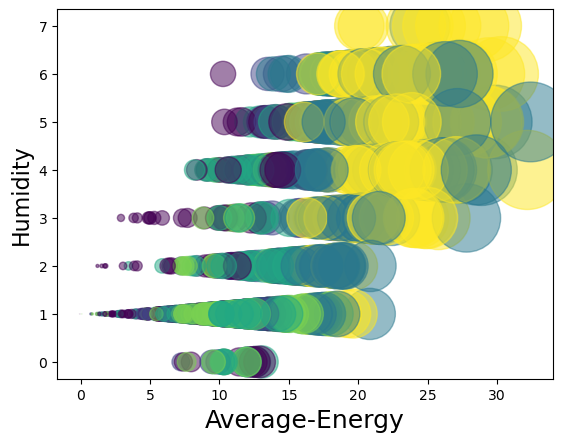

In [53]:
area = np.pi*(Y[:,0])**2
plt.scatter(Y[:,0],Y[:,7],s=area,c=labels.astype(float),alpha=0.5)
plt.xlabel('Average-Energy',fontsize=18)
plt.ylabel('Humidity',fontsize=16)
plt.show()

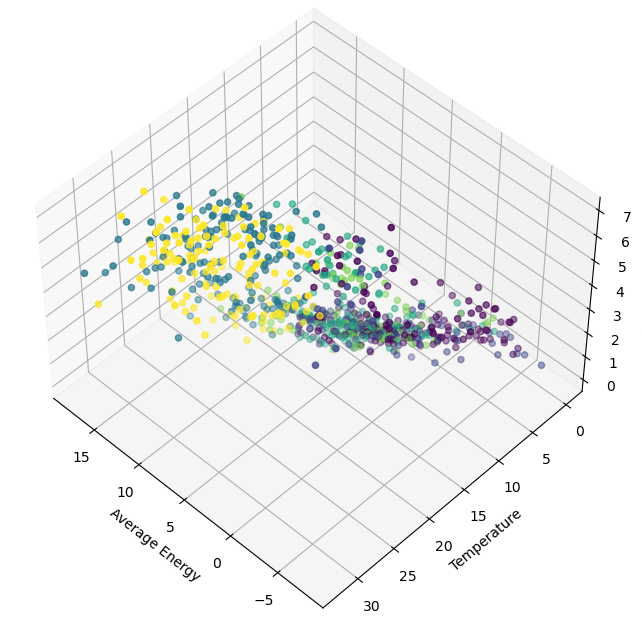

In [54]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect = [0,0,.95,1], elev=48,azim=134,auto_add_to_figure=False)
fig.add_axes(ax)
plt.cla()

ax.set_xlabel('Average Energy')
ax.set_ylabel('Temperature')
ax.set_zlabel('Humidity')

ax.scatter(X[:,1],X[:,0],X[:,7], c=labels.astype(float))

In [55]:
from sklearn.preprocessing import StandardScaler
X = weather_matrix.values[:,1:]
Y = np.nan_to_num(X)
Clustered_dataset = StandardScaler().fit_transform(X)
Clustered_dataset


array([[-0.5248948 , -0.05175081, -0.62488734, ..., -0.85320115,
         1.52290124, -0.81699909],
       [-0.1189876 ,  0.40989488, -0.36372909, ..., -0.85320115,
         1.62706422, -0.81699909],
       [-0.10319354,  0.14144893,  0.00189245, ..., -0.85320115,
        -1.70615092, -0.81699909],
       ...,
       [-0.37801009, -0.77370772, -1.14720383, ..., -0.31719921,
         1.38401728, -1.40421718],
       [-0.53279182, -0.70456255, -0.83381393, ..., -0.31719921,
         1.48818025,  0.3574371 ],
       [-1.00029584, -0.6984615 ,  0.99429378, ..., -0.85320115,
         1.62706422,  0.94465519]])

In [56]:
K=range(1,10)   # Here K denotes the provisional cluster numbers taken under consideration
inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40, n_init=10).fit(X)
    inertia.append(kmeans.inertia_)
    
print(inertia)

[167573.27931932377, 102474.42887176915, 69708.143430381, 55179.688290140584, 45611.79896170285, 39463.73857245002, 35724.23401301524, 33377.28633725177, 31593.203108513735]


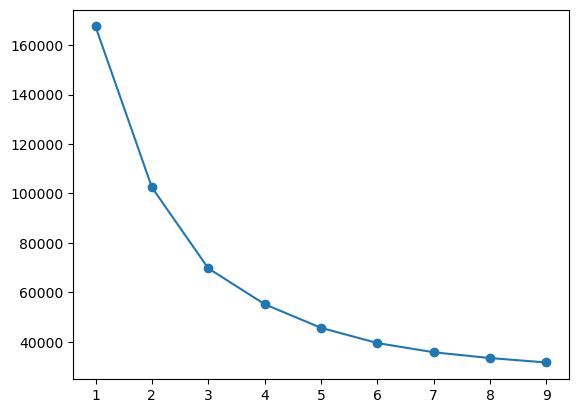

In [57]:
plt.plot(K,inertia, marker='o')
plt.show()

In [58]:
scaler1 = StandardScaler()

In [59]:
weather_scaled1 = scaler1.fit_transform(weather_energy[['temperatureMax','humidity','windSpeed']])
weather_scaled1

array([[-0.5248948 ,  1.57984066, -0.9146435 ],
       [-0.1189876 ,  1.15732513,  0.25652565],
       [-0.10319354,  0.10103632,  0.83039853],
       ...,
       [-0.37801009, -0.53273697,  0.12769704],
       [-0.53279182, -0.42710809,  0.31508411],
       [-1.00029584,  0.84043849, -0.79752659]])

In [60]:
kmeans = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled1)
weather_energy['weather_cluster'] = kmeans.labels_

D:\anaconda_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda_data\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


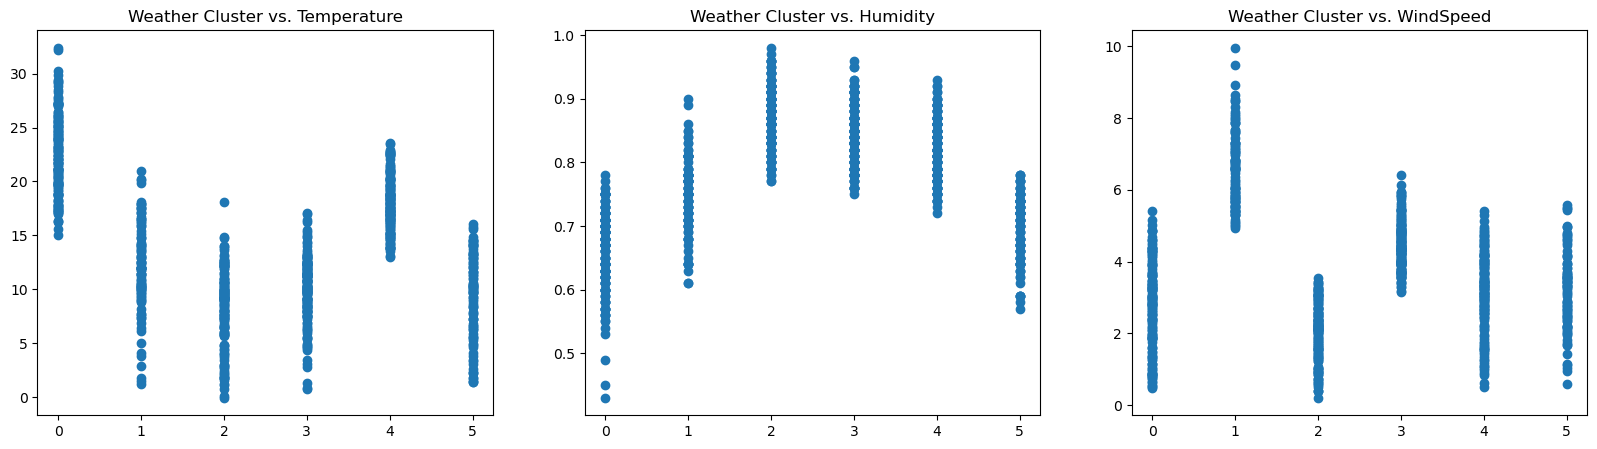

In [61]:
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.scatter(weather_energy.weather_cluster,weather_energy.temperatureMax)
plt.title('Weather Cluster vs. Temperature')
plt.subplot(1, 3, 2)
plt.scatter(weather_energy.weather_cluster,weather_energy.humidity)
plt.title('Weather Cluster vs. Humidity')
plt.subplot(1, 3, 3)
plt.scatter(weather_energy.weather_cluster,weather_energy.windSpeed)
plt.title('Weather Cluster vs. WindSpeed')

plt.show()

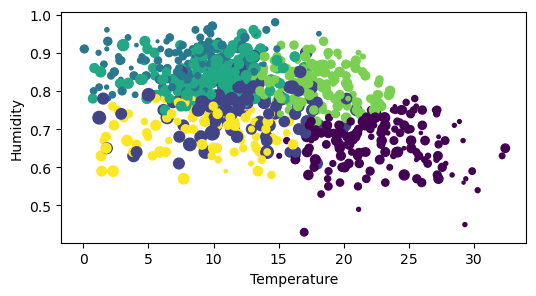

In [62]:
fig, ax1 = plt.subplots(figsize = (6,3))
ax1.scatter(weather_energy.temperatureMax, 
            weather_energy.humidity, 
            s = weather_energy.windSpeed*10,
            c = weather_energy.weather_cluster)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Humidity')
plt.show()

In [63]:
clusterNum = 6
k_means = KMeans(init="k-means++",n_clusters = clusterNum, n_init=12)
k_means.fit(Y)
labels = k_means.labels_
print(labels)

[1 1 1 1 3 1 0 3 0 3 0 0 0 0 0 0 3 3 0 0 5 5 5 5 0 3 3 3 3 1 3 1 1 1 1 3 3
 3 0 0 0 0 3 0 1 3 1 1 1 1 1 1 1 1 1 1 1 3 3 0 3 3 3 3 0 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 4 1 1 1 1 4 1 1 1 3 3 3 1 3 1 1 1 1 1
 1 1 4 3 3 3 1 1 1 1 4 4 1 1 1 1 4 4 3 3 0 0 0 3 3 3 0 5 5 5 0 0 0 3 1 0 5
 5 5 5 0 5 5 5 5 0 3 0 2 2 4 0 0 0 3 2 2 2 2 4 1 1 3 3 1 3 0 2 0 2 2 4 4 4
 4 4 4 4 4 4 4 2 0 2 2 2 5 5 2 2 0 0 2 2 2 2 2 4 4 4 2 2 4 2 4 4 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 4
 4 4 4 4 2 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 2 2 1 4 4 4 4 4 4 4 4 2 2 2 2 4
 2 4 2 2 2 4 4 2 3 0 5 5 5 2 2 4 4 2 2 0 0 2 2 4 2 2 3 0 0 0 0 0 0 5 0 0 2
 3 4 4 4 2 3 3 3 0 0 5 5 5 5 5 0 3 1 3 0 5 3 3 4 1 1 3 0 3 0 0 0 0 0 0 0 5
 0 3 3 3 3 3 0 0 0 3 0 3 3 3 1 3 0 5 5 5 0 3 3 0 0 0 0 5 5 0 0 3 0 0 0 3 1
 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 0 5 5 5 0 0 3 3 0 5 0 0 0 3 0 3 3 3 5 0 3 3
 3 5 5 3 3 0 3 1 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 0 0 5 5 0 0 3 3 3 3 0 5 5
 5 5 0 3 3 3 3 3 3 3 3 3 

In [64]:
weather_matrix["Clus-data"] = labels
weather_matrix.head()

C:\Users\ABHIMAN\AppData\Local\Temp\ipykernel_404\2207410829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_matrix["Clus-data"] = labels


avg_energy  temperatureMax  dewPoint  cloudCover  windSpeed  pressure  \
0    6.952692           10.36      6.29        0.36       2.04   1027.12   
1    8.536480           12.93      8.56        0.41       4.04   1027.22   
2    9.499781           13.03      7.24        0.48       5.02   1024.47   
3   10.267707           12.96      6.96        0.44       5.75   1025.80   
4   10.850805           13.54      5.76        0.42       5.48   1021.11   

   visibility  humidity  uvIndex  moonPhase  Clus-data  
0        8.06      0.93      1.0       0.94          1  
1       10.64      0.89      1.0       0.97          1  
2       12.38      0.79      1.0       0.01          1  
3       13.07      0.81      1.0       0.05          1  
4       13.08      0.72      1.0       0.08          3

In [65]:
weather_matrix["Clus-data"].value_counts()

Clus-data
2    166
3    154
0    150
4    141
1    125
5     92
Name: count, dtype: int64

In [66]:
weather_matrix.groupby("Clus-data").mean()

avg_energy  temperatureMax   dewPoint  cloudCover  windSpeed  \
Clus-data                                                                 
0           11.149339       10.863533   5.228800    0.511000   4.115200   
1           11.978349        9.657760   3.241280    0.509840   2.924480   
2            8.726382       19.364398  11.726325    0.482470   3.619217   
3           11.763862        8.502013   2.023312    0.493182   3.828247   
4            8.582705       21.488369  10.764681    0.373475   2.739504   
5           11.363877       10.211087   4.927826    0.522391   4.597283   

              pressure  visibility  humidity   uvIndex  moonPhase  
Clus-data                                                          
0          1006.357200   11.231067  0.818867  1.740000   0.494733  
1          1029.569280   10.535440  0.793200  1.464000   0.523920  
2          1011.488133   11.468253  0.781687  4.036145   0.532530  
3          1016.585844   11.392662  0.774675  1.779221   0.509740  
4          1022.233759   11.980071  0.702553  4.340426   0.476879  
5           993.431522   10.935761  0.827174  1.586957   0.449022

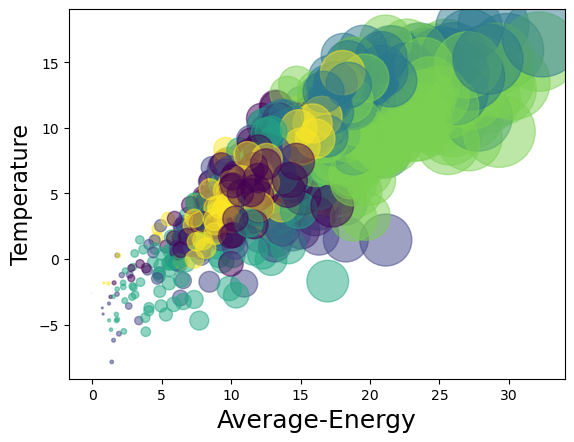

In [67]:
area = np.pi*(Y[:,0])**2
plt.scatter(Y[:,0],Y[:,1],s=area,c=labels.astype(float),alpha=0.5)
plt.xlabel('Average-Energy',fontsize=18)
plt.ylabel('Temperature',fontsize=16)
plt.show()

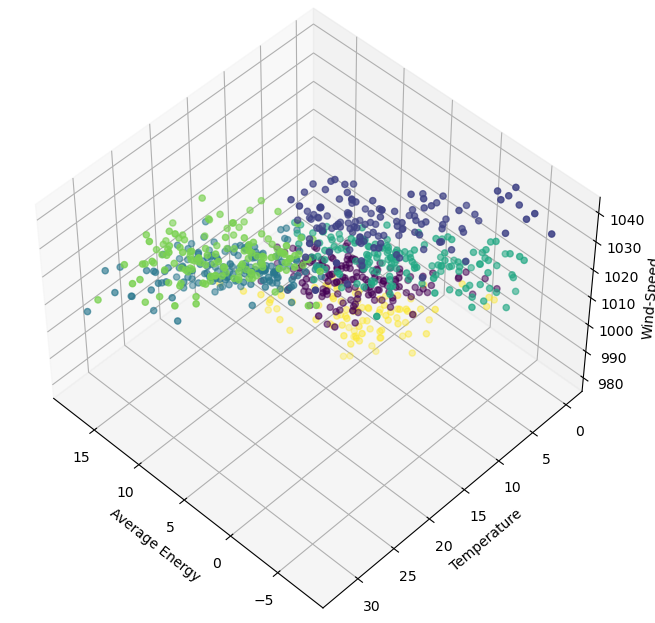

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect = [0,0,.95,1], elev=48,azim=134,auto_add_to_figure=False)
fig.add_axes(ax)
plt.cla()

ax.set_xlabel('Average Energy')
ax.set_ylabel('Temperature')
ax.set_zlabel('Wind-Speed')

ax.scatter(X[:,1],X[:,0],X[:,4], c=labels.astype(float))

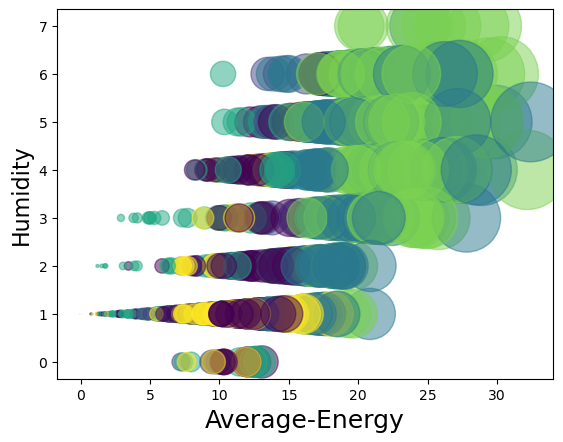

In [69]:
area = np.pi*(Y[:,0])**2
plt.scatter(Y[:,0],Y[:,7],s=area,c=labels.astype(float),alpha=0.5)
plt.xlabel('Average-Energy',fontsize=18)
plt.ylabel('Humidity',fontsize=16)
plt.show()

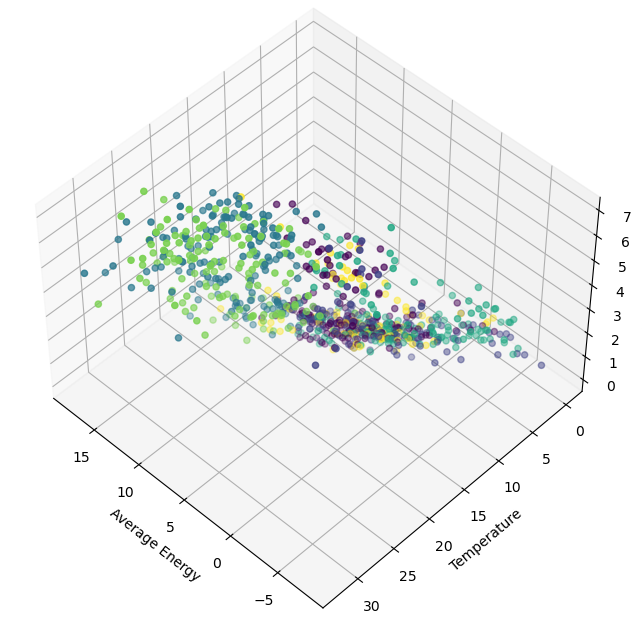

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf()
ax = Axes3D(fig, rect = [0,0,.95,1], elev=48,azim=134,auto_add_to_figure=False)
fig.add_axes(ax)
plt.cla()

ax.set_xlabel('Average Energy')
ax.set_ylabel('Temperature')
ax.set_zlabel('Humidity')

ax.scatter(X[:,1],X[:,0],X[:,7], c=labels.astype(float))

In [71]:
holiday = pd.read_csv('C:/Users/ABHIMAN/Music/project dataset/input dataset/uk_bank_holidays.csv')
holiday.head(10)

Bank holidays                                          Type
0    2012-12-26                                    Boxing Day
1    2012-12-25                                 Christmas Day
2    2012-08-27                           Summer bank holiday
3    2012-05-06  Queen?s Diamond Jubilee (extra bank holiday)
4    2012-04-06          Spring bank holiday (substitute day)
5    2012-07-05                        Early May bank holiday
6    2012-09-04                                 Easter Monday
7    2012-06-04                                   Good Friday
8    2012-02-01               New Year?s Day (substitute day)
9    2013-12-26                                    Boxing Day

In [72]:
weather_energy.head(10)

day   energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
0  2011-11-23    90.385000     13    6.952692           10.36          229   
1  2011-11-24   213.412000     25    8.536480           12.93          204   
2  2011-11-25   303.993000     32    9.499781           13.03          243   
3  2011-11-26   420.976000     41   10.267707           12.96          237   
4  2011-11-27   444.883001     41   10.850805           13.54          256   
5  2011-11-28   500.686000     55    9.103382           12.58          190   
6  2011-11-29   584.317000     63    9.274873           13.47          213   
7  2011-11-30   669.827000     76    8.813513           11.87          205   
8  2011-12-01   848.949001     92    9.227707           12.15          225   
9  2011-12-02  1014.591001    100   10.145910            8.07          232   

   dewPoint  cloudCover  windSpeed  pressure  ...  humidity  \
0      6.29        0.36       2.04   1027.12  ...      0.93   
1      8.56        0.41       4.04   1027.22  ...      0.89   
2      7.24        0.48       5.02   1024.47  ...      0.79   
3      6.96        0.44       5.75   1025.80  ...      0.81   
4      5.76        0.42       5.48   1021.11  ...      0.72   
5      4.39        0.56       2.34   1022.80  ...      0.86   
6      8.61        0.60       6.48   1009.70  ...      0.82   
7      5.26        0.31       4.43   1019.43  ...      0.78   
8      6.87        0.57       2.57   1007.12  ...      0.82   
9      3.69        0.32       3.00   1012.12  ...      0.87   

   apparentTemperatureLow  apparentTemperatureMax  uvIndex  temperatureLow  \
0                    6.56                   10.36      1.0            8.24   
1                    7.30                   12.93      1.0            9.71   
2                    4.69                   13.03      1.0            7.01   
3                   11.59                   12.96      1.0           11.59   
4                    1.31                   13.54      1.0            1.31   
5                   10.27                   12.58      1.0           10.27   
6                    3.34                   13.47      1.0            6.34   
7                    6.23                   11.87      1.0            9.44   
8                    0.46                   12.15      1.0            2.56   
9                    3.26                    5.33      1.0            6.33   

   temperatureMin  temperatureHigh  apparentTemperatureMin  moonPhase  \
0            3.81            10.36                    2.18       0.94   
1            8.56            12.93                    7.01       0.97   
2            7.46            12.27                    4.84       0.01   
3            7.01            12.96                    4.69       0.05   
4            4.47            13.54                    2.94       0.08   
5            1.31            10.27                    1.31       0.12   
6            6.37            13.47                    3.39       0.15   
7            6.34            11.87                    3.34       0.19   
8            6.08            12.15                    5.29       0.22   
9            2.56             7.36                    0.46       0.25   

   weather_cluster  
0                2  
1                3  
2                3  
3                1  
4                1  
5                2  
6                1  
7                3  
8                2  
9                2  

[10 rows x 22 columns]

In [73]:
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays'],format='%Y-%m-%d').dt.date

In [74]:
weather_energy = weather_energy.merge(holiday, left_on = 'day',right_on = 'Bank holidays',how = 'left')
weather_energy['holiday_index'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

In [75]:
weather_energy.head(10)

day   energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
0  2011-11-23    90.385000     13    6.952692           10.36          229   
1  2011-11-24   213.412000     25    8.536480           12.93          204   
2  2011-11-25   303.993000     32    9.499781           13.03          243   
3  2011-11-26   420.976000     41   10.267707           12.96          237   
4  2011-11-27   444.883001     41   10.850805           13.54          256   
5  2011-11-28   500.686000     55    9.103382           12.58          190   
6  2011-11-29   584.317000     63    9.274873           13.47          213   
7  2011-11-30   669.827000     76    8.813513           11.87          205   
8  2011-12-01   848.949001     92    9.227707           12.15          225   
9  2011-12-02  1014.591001    100   10.145910            8.07          232   

   dewPoint  cloudCover  windSpeed  pressure  ...  uvIndex  temperatureLow  \
0      6.29        0.36       2.04   1027.12  ...      1.0            8.24   
1      8.56        0.41       4.04   1027.22  ...      1.0            9.71   
2      7.24        0.48       5.02   1024.47  ...      1.0            7.01   
3      6.96        0.44       5.75   1025.80  ...      1.0           11.59   
4      5.76        0.42       5.48   1021.11  ...      1.0            1.31   
5      4.39        0.56       2.34   1022.80  ...      1.0           10.27   
6      8.61        0.60       6.48   1009.70  ...      1.0            6.34   
7      5.26        0.31       4.43   1019.43  ...      1.0            9.44   
8      6.87        0.57       2.57   1007.12  ...      1.0            2.56   
9      3.69        0.32       3.00   1012.12  ...      1.0            6.33   

   temperatureMin  temperatureHigh  apparentTemperatureMin  moonPhase  \
0            3.81            10.36                    2.18       0.94   
1            8.56            12.93                    7.01       0.97   
2            7.46            12.27                    4.84       0.01   
3            7.01            12.96                    4.69       0.05   
4            4.47            13.54                    2.94       0.08   
5            1.31            10.27                    1.31       0.12   
6            6.37            13.47                    3.39       0.15   
7            6.34            11.87                    3.34       0.19   
8            6.08            12.15                    5.29       0.22   
9            2.56             7.36                    0.46       0.25   

   weather_cluster  Bank holidays  Type  holiday_index  
0                2            NaN   NaN              0  
1                3            NaN   NaN              0  
2                3            NaN   NaN              0  
3                1            NaN   NaN              0  
4                1            NaN   NaN              0  
5                2            NaN   NaN              0  
6                1            NaN   NaN              0  
7                3            NaN   NaN              0  
8                2            NaN   NaN              0  
9                2            NaN   NaN              0  

[10 rows x 25 columns]

In [76]:
weather_energy['Year'] = pd.DatetimeIndex(weather_energy['day']).year  
weather_energy['Month'] = pd.DatetimeIndex(weather_energy['day']).month

In [77]:
weather_energy.head()

day  energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
0  2011-11-23   90.385000     13    6.952692           10.36          229   
1  2011-11-24  213.412000     25    8.536480           12.93          204   
2  2011-11-25  303.993000     32    9.499781           13.03          243   
3  2011-11-26  420.976000     41   10.267707           12.96          237   
4  2011-11-27  444.883001     41   10.850805           13.54          256   

   dewPoint  cloudCover  windSpeed  pressure  ...  temperatureMin  \
0      6.29        0.36       2.04   1027.12  ...            3.81   
1      8.56        0.41       4.04   1027.22  ...            8.56   
2      7.24        0.48       5.02   1024.47  ...            7.46   
3      6.96        0.44       5.75   1025.80  ...            7.01   
4      5.76        0.42       5.48   1021.11  ...            4.47   

   temperatureHigh  apparentTemperatureMin  moonPhase  weather_cluster  \
0            10.36                    2.18       0.94                2   
1            12.93                    7.01       0.97                3   
2            12.27                    4.84       0.01                3   
3            12.96                    4.69       0.05                1   
4            13.54                    2.94       0.08                1   

   Bank holidays  Type  holiday_index  Year  Month  
0            NaN   NaN              0  2011     11  
1            NaN   NaN              0  2011     11  
2            NaN   NaN              0  2011     11  
3            NaN   NaN              0  2011     11  
4            NaN   NaN              0  2011     11  

[5 rows x 27 columns]

In [78]:
weather_energy['day'] = pd.to_datetime(weather_energy['day'])
weather_energy.set_index(['day'],inplace=True)

In [79]:
weather_energy.head(10)

energy_sum  LCLid  avg_energy  temperatureMax  windBearing  \
day                                                                       
2011-11-23    90.385000     13    6.952692           10.36          229   
2011-11-24   213.412000     25    8.536480           12.93          204   
2011-11-25   303.993000     32    9.499781           13.03          243   
2011-11-26   420.976000     41   10.267707           12.96          237   
2011-11-27   444.883001     41   10.850805           13.54          256   
2011-11-28   500.686000     55    9.103382           12.58          190   
2011-11-29   584.317000     63    9.274873           13.47          213   
2011-11-30   669.827000     76    8.813513           11.87          205   
2011-12-01   848.949001     92    9.227707           12.15          225   
2011-12-02  1014.591001    100   10.145910            8.07          232   

            dewPoint  cloudCover  windSpeed  pressure  \
day                                                     
2011-11-23      6.29        0.36       2.04   1027.12   
2011-11-24      8.56        0.41       4.04   1027.22   
2011-11-25      7.24        0.48       5.02   1024.47   
2011-11-26      6.96        0.44       5.75   1025.80   
2011-11-27      5.76        0.42       5.48   1021.11   
2011-11-28      4.39        0.56       2.34   1022.80   
2011-11-29      8.61        0.60       6.48   1009.70   
2011-11-30      5.26        0.31       4.43   1019.43   
2011-12-01      6.87        0.57       2.57   1007.12   
2011-12-02      3.69        0.32       3.00   1012.12   

            apparentTemperatureHigh  ...  temperatureMin  temperatureHigh  \
day                                  ...                                    
2011-11-23                    10.36  ...            3.81            10.36   
2011-11-24                    12.93  ...            8.56            12.93   
2011-11-25                    12.27  ...            7.46            12.27   
2011-11-26                    12.96  ...            7.01            12.96   
2011-11-27                    13.54  ...            4.47            13.54   
2011-11-28                    10.27  ...            1.31            10.27   
2011-11-29                    13.47  ...            6.37            13.47   
2011-11-30                    11.87  ...            6.34            11.87   
2011-12-01                    12.15  ...            6.08            12.15   
2011-12-02                     5.33  ...            2.56             7.36   

            apparentTemperatureMin  moonPhase  weather_cluster  Bank holidays  \
day                                                                             
2011-11-23                    2.18       0.94                2            NaN   
2011-11-24                    7.01       0.97                3            NaN   
2011-11-25                    4.84       0.01                3            NaN   
2011-11-26                    4.69       0.05                1            NaN   
2011-11-27                    2.94       0.08                1            NaN   
2011-11-28                    1.31       0.12                2            NaN   
2011-11-29                    3.39       0.15                1            NaN   
2011-11-30                    3.34       0.19                3            NaN   
2011-12-01                    5.29       0.22                2            NaN   
2011-12-02                    0.46       0.25                2            NaN   

            Type  holiday_index  Year  Month  
day                                           
2011-11-23   NaN              0  2011     11  
2011-11-24   NaN              0  2011     11  
2011-11-25   NaN              0  2011     11  
2011-11-26   NaN              0  2011     11  
2011-11-27   NaN              0  2011     11  
2011-11-28   NaN              0  2011     11  
2011-11-29   NaN              0  2011     11  
2011-11-30   NaN              0  2011     11  
2011-12-01   NaN              0  2011     12  
2011-12-02  

In [80]:
weather_energy.describe()

energy_sum        LCLid  avg_energy  temperatureMax  windBearing  \
count    828.000000   828.000000  828.000000      828.000000   828.000000   
mean   43458.973499  4228.525362   10.489791       13.683370   197.958937   
std    20572.705709  1793.541479    1.902243        6.335323    89.115895   
min       90.385000    13.000000    0.211766       -0.060000     0.000000   
25%    34497.936249  3995.000000    8.676949        9.315000   130.000000   
50%    46592.128499  5135.000000   10.522346       12.575000   221.000000   
75%    59751.980995  5369.000000   11.998284       18.097500   256.000000   
max    84156.135002  5541.000000   15.964434       32.400000   359.000000   

         dewPoint  cloudCover   windSpeed     pressure  \
count  828.000000  828.000000  828.000000   828.000000   
mean     6.544469    0.479638    3.601932  1014.059964   
std      4.920163    0.191571    1.708727    11.111217   
min     -7.840000    0.000000    0.200000   979.250000   
25%      3.102500    0.350000    2.370000  1007.415000   
50%      6.435000    0.470000    3.470000  1014.445000   
75%     10.222500    0.600000    4.600000  1021.630000   
max     17.770000    1.000000    9.960000  1040.920000   

       apparentTemperatureHigh  ...     uvIndex  temperatureLow  \
count               828.000000  ...  828.000000      828.000000   
mean                 12.702476  ...    2.591787        7.764734   
std                   7.464249  ...    1.866793        4.964961   
min                  -6.460000  ...    0.000000       -5.640000   
25%                   6.610000  ...    1.000000        3.977500   
50%                  12.425000  ...    2.000000        7.540000   
75%                  18.090000  ...    4.000000       11.652500   
max                  32.420000  ...    7.000000       20.540000   

       temperatureMin  temperatureHigh  apparentTemperatureMin   moonPhase  \
count      828.000000       828.000000              828.000000  828.000000   
mean         7.454251        13.561727                5.769867    0.501389   
std          4.987357         6.414730                6.176753    0.288184   
min         -5.640000        -0.810000               -8.880000    0.000000   
25%          3.627500         9.092500                1.067500    0.250000   
50%          7.075000        12.425000                4.905000    0.500000   
75%         11.462500        18.082500               11.462500    0.750000   
max         20.540000        32.400000               20.540000    0.990000   

       weather_cluster  holiday_index         Year       Month  
count       828.000000     828.000000   828.000000  828.000000  
mean          2.423913       0.020531  2012.533816    6.398551  
std           1.634796       0.141895     0.695514    3.690649  
min           0.000000       0.000000  2011.000000    1.000000  
25%           1.000000       0.000000  2012.000000    3.000000  
50%           3.000000       0.000000  2013.000000    6.000000  
75%           4.000000       0.000000  2013.000000   10.000000  
max           5.000000       1.000000  2014.000000   12.000000  

[8 rows x 24 columns]

In [81]:
weather_energy.shape

(828, 26)

In [82]:
weather_model_data = weather_energy[['avg_energy','weather_cluster','holiday_index']]

In [83]:
weather_model_data.head()

avg_energy  weather_cluster  holiday_index
day                                                   
2011-11-23    6.952692                2              0
2011-11-24    8.536480                3              0
2011-11-25    9.499781                3              0
2011-11-26   10.267707                1              0
2011-11-27   10.850805                1              0

In [84]:
weather_model_data.shape

(828, 3)

In [85]:
len(weather_model_data)

828

In [86]:
train = weather_model_data.iloc[0:(len(weather_model_data)-30)]
test = weather_model_data.iloc[len(train):(len(weather_model_data)-1)]
print(train.shape)
print(test.shape)


(798, 3)
(29, 3)


<Axes: xlabel='day'>

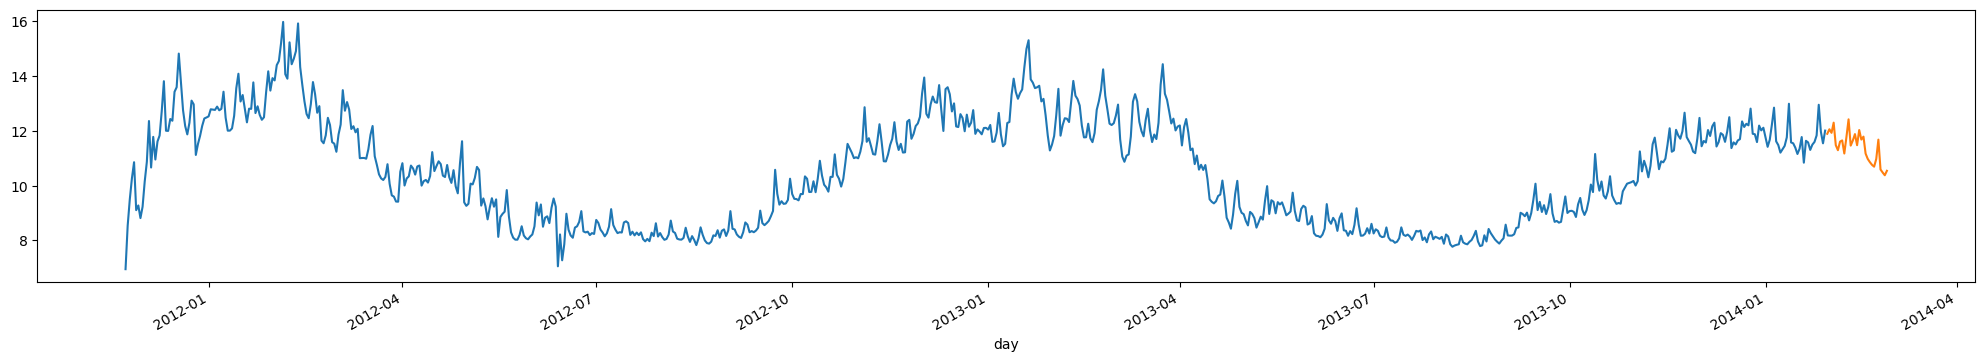

In [87]:
train['avg_energy'].plot(figsize=(25,4))
test['avg_energy'].plot(figsize=(25,4))

In [88]:
test.head(10)

avg_energy  weather_cluster  holiday_index
day                                                   
2014-01-30   11.886982                2              0
2014-01-31   12.051321                3              0
2014-02-01   11.921217                1              0
2014-02-02   12.291726                5              0
2014-02-03   11.471760                3              0
2014-02-04   11.288728                1              0
2014-02-05   11.602300                1              0
2014-02-06   11.644153                3              0
2014-02-07   11.168278                3              0
2014-02-08   11.769625                1              0

In [89]:
# Testing for Stationarity in the given data #
# In this scenario we make use of the Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller

In [90]:
# H0 : It is non-stationary
# H1 : It is stationary

def adfuller_test(energy):
    result = adfuller(energy)
    labels = ['ADF Test Statistic','p-value','Lags-Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [91]:
adfuller_test(weather_model_data['avg_energy'])

ADF Test Statistic : -1.7569294061150675
p-value : 0.4020448139997546
Lags-Used : 21
Number of Observations : 806
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [92]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [93]:
                                 # DIFFERENCING #
# If the data is non-stationary we make the data stationary by applying differencing
weather_model_data['avg_energy']

day
2011-11-23     6.952692
2011-11-24     8.536480
2011-11-25     9.499781
2011-11-26    10.267707
2011-11-27    10.850805
                ...    
2014-02-24    10.586235
2014-02-25    10.476498
2014-02-26    10.375366
2014-02-27    10.537250
2014-02-28     0.211766
Name: avg_energy, Length: 828, dtype: float64

In [94]:
weather_model_data['avg_energy seasonal difference'] = weather_model_data['avg_energy'] - weather_model_data['avg_energy'].shift(90)

C:\Users\ABHIMAN\AppData\Local\Temp\ipykernel_404\3157546428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_model_data['avg_energy seasonal difference'] = weather_model_data['avg_energy'] - weather_model_data['avg_energy'].shift(90)


In [95]:
weather_model_data.head()

avg_energy  weather_cluster  holiday_index  \
day                                                      
2011-11-23    6.952692                2              0   
2011-11-24    8.536480                3              0   
2011-11-25    9.499781                3              0   
2011-11-26   10.267707                1              0   
2011-11-27   10.850805                1              0   

            avg_energy seasonal difference  
day                                         
2011-11-23                             NaN  
2011-11-24                             NaN  
2011-11-25                             NaN  
2011-11-26                             NaN  
2011-11-27                             NaN

In [96]:
weather_model_data.tail()

avg_energy  weather_cluster  holiday_index  \
day                                                      
2014-02-24   10.586235                1              0   
2014-02-25   10.476498                1              0   
2014-02-26   10.375366                5              0   
2014-02-27   10.537250                5              0   
2014-02-28    0.211766                2              0   

            avg_energy seasonal difference  
day                                         
2014-02-24                       -1.179797  
2014-02-25                       -1.146712  
2014-02-26                       -1.114074  
2014-02-27                       -0.701538  
2014-02-28                      -10.969257

In [97]:
adfuller_test(weather_model_data['avg_energy seasonal difference'].dropna())

ADF Test Statistic : -1.5761671863011575
p-value : 0.49555347325171334
Lags-Used : 15
Number of Observations : 722
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='day'>

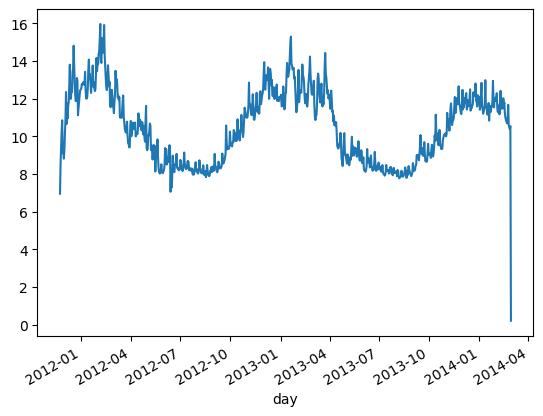

In [98]:
weather_model_data['avg_energy'].plot()

<Axes: xlabel='day'>

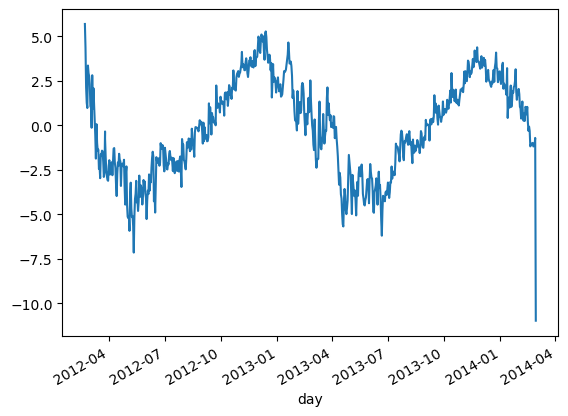

In [99]:
weather_model_data['avg_energy seasonal difference'].plot()

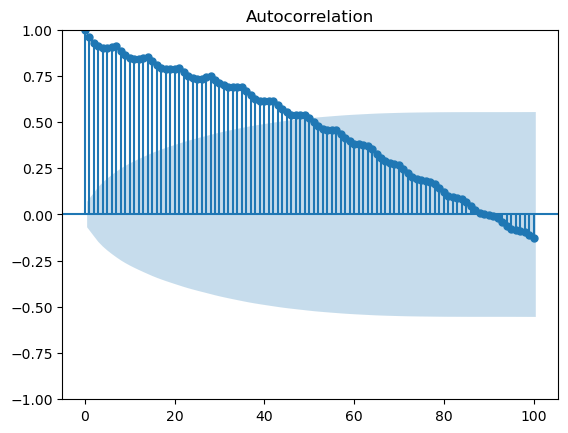

In [100]:
plot_acf(train.avg_energy,lags=100)
plt.show()

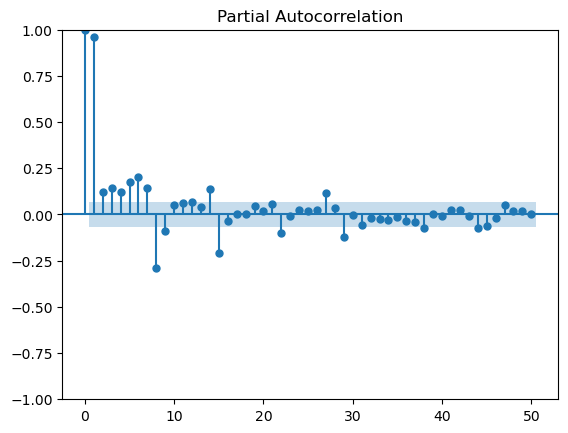

In [101]:
plot_pacf(train.avg_energy,lags=50)
plt.show()

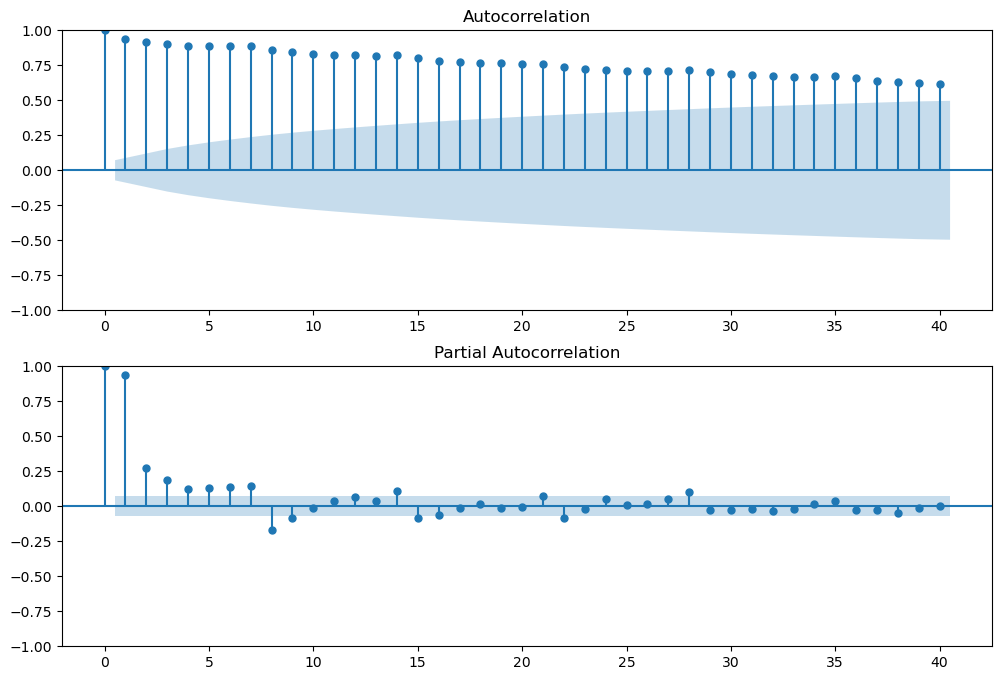

In [102]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(weather_model_data['avg_energy seasonal difference'].dropna(), lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(weather_model_data['avg_energy seasonal difference'].dropna(), lags=40,ax=ax2)

In [103]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [104]:
weather_model_data.shape

(828, 4)

In [105]:
train = weather_model_data.iloc[0:(len(weather_model_data)-30)]
test = weather_model_data.iloc[len(train):(len(weather_model_data)-1)]
print(train.shape,test.shape)


(798, 4) (29, 4)


In [106]:
stepwise_fit= auto_arima(weather_model_data['avg_energy'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1534.339, Time=2.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1585.395, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1577.445, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1572.724, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1583.534, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1547.233, Time=1.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1546.365, Time=1.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1491.513, Time=3.52 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1545.839, Time=0.80 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1472.787, Time=2.90 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1542.293, Time=0.84 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=1479.030, Time=1.55 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=1488.993, Time=2.85 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=1540.983, Time=2.66 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

In [107]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  828
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -726.202
Date:                Wed, 21 Feb 2024   AIC                           1466.404
Time:                        17:43:22   BIC                           1499.428
Sample:                             0   HQIC                          1479.070
                                - 828                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8933      0.053     16.762      0.000       0.789       0.998
ar.L2         -0.7608      0.071    -10.777      0.000      -0.899      -0.622
ar.L3         -0.0891      0.070     -1.270      0.204      -0.227       0.048
ar.L4         -0.2109      0.053     -4.006      0.000      -0.314      -0.108
ma.L1         -1.2221      0.023    -54.143      0.000      -1.266      -1.178
ma.L2          0.9349      0.024     39.396      0.000       0.888       0.981
sigma2         0.3367      0.004     94.640      0.000       0.330       0.344
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            541538.92
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -6.94
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [108]:
model_1 = ARIMA(weather_model_data['avg_energy'],order=(4,1,2))
model_1 = model_1.fit()

D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda_data\Lib\s

In [109]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             avg_energy   No. Observations:                  828
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -726.202
Date:                Wed, 21 Feb 2024   AIC                           1466.404
Time:                        17:43:24   BIC                           1499.428
Sample:                             0   HQIC                          1479.070
                                - 828                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8933      0.053     16.762      0.000       0.789       0.998
ar.L2         -0.7608      0.071    -10.777      0.000      -0.899      -0.622
ar.L3         -0.0891      0.070     -1.270      0.204      -0.227       0.048
ar.L4         -0.2109      0.053     -4.006      0.000      -0.314      -0.108
ma.L1         -1.2221      0.023    -54.143      0.000      -1.266      -1.178
ma.L2          0.9349      0.024     39.396      0.000       0.888       0.981
sigma2         0.3367      0.004     94.640      0.000       0.330       0.344
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            541538.92
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.95   Skew:                            -6.94
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [110]:
test.mean()

avg_energy                        11.396227
weather_cluster                    2.344828
holiday_index                      0.000000
avg_energy seasonal difference     0.194759
dtype: float64

In [111]:
index_future_dates = pd.date_range(start='2014-02-28',end='2014-03-30')
print(index_future_dates)

DatetimeIndex(['2014-02-28', '2014-03-01', '2014-03-02', '2014-03-03',
               '2014-03-04', '2014-03-05', '2014-03-06', '2014-03-07',
               '2014-03-08', '2014-03-09', '2014-03-10', '2014-03-11',
               '2014-03-12', '2014-03-13', '2014-03-14', '2014-03-15',
               '2014-03-16', '2014-03-17', '2014-03-18', '2014-03-19',
               '2014-03-20', '2014-03-21', '2014-03-22', '2014-03-23',
               '2014-03-24', '2014-03-25', '2014-03-26', '2014-03-27',
               '2014-03-28', '2014-03-29', '2014-03-30'],
              dtype='datetime64[ns]', freq='D')


In [112]:
pred1 = model_1.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred1.index = index_future_dates
print(pred1)


D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


2014-02-28    4.278625
2014-03-01    4.278625
2014-03-02    4.278625
2014-03-03    4.278625
2014-03-04    4.278625
2014-03-05    4.278625
2014-03-06    4.278625
2014-03-07    4.278625
2014-03-08    4.278625
2014-03-09    4.278625
2014-03-10    4.278625
2014-03-11    4.278625
2014-03-12    4.278625
2014-03-13    4.278625
2014-03-14    4.278625
2014-03-15    4.278625
2014-03-16    4.278625
2014-03-17    4.278625
2014-03-18    4.278625
2014-03-19    4.278625
2014-03-20    4.278625
2014-03-21    4.278625
2014-03-22    4.278625
2014-03-23    4.278625
2014-03-24    4.278625
2014-03-25    4.278625
2014-03-26    4.278625
2014-03-27    4.278625
2014-03-28    4.278625
2014-03-29    4.278625
2014-03-30    4.278625
Freq: D, Name: ARIMA Predictions, dtype: float64


In [113]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResultsWrapper

In [114]:
weather_model_data.shape

(828, 4)

In [115]:
train = weather_model_data.iloc[0:(len(weather_model_data)-30)]
test = weather_model_data.iloc[len(train):(len(weather_model_data)-1)]
print(train.shape,test.shape)


(798, 4) (29, 4)


In [116]:
weather_model_data.head()

avg_energy  weather_cluster  holiday_index  \
day                                                      
2011-11-23    6.952692                2              0   
2011-11-24    8.536480                3              0   
2011-11-25    9.499781                3              0   
2011-11-26   10.267707                1              0   
2011-11-27   10.850805                1              0   

            avg_energy seasonal difference  
day                                         
2011-11-23                             NaN  
2011-11-24                             NaN  
2011-11-25                             NaN  
2011-11-26                             NaN  
2011-11-27                             NaN

In [117]:
endog = train['avg_energy']
exog = sm.add_constant(train[['weather_cluster','holiday_index']])

model = SARIMAX(endog, exog=exog, order=(4, 1, 2), seasonal_order=(1, 1, 0, 12))
results = model.fit()

D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\anaconda_data\Lib\site-packages\statsm

In [118]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          avg_energy   No. Observations:                  798
Model:             SARIMAX(4, 1, 2)x(1, 1, [], 12)   Log Likelihood                -638.916
Date:                             Wed, 21 Feb 2024   AIC                           1299.831
Time:                                     17:43:40   BIC                           1351.154
Sample:                                          0   HQIC                          1319.565
                                             - 798                                         
Covariance Type:                               opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.341e-07    3.7e+04  -9.04e-12      1.000   -7.24e+04    7.24e+04
weather_cluster    -0.0100      0.010     -0.972      0.331      -0.030       0.010
holiday_index       0.0250      0.097      0.259      0.796      -0.165       0.215
ar.L1               0.9093      0.037     24.703      0.000       0.837       0.981
ar.L2              -0.8077      0.045    -18.135      0.000      -0.895      -0.720
ar.L3              -0.0409      0.044     -0.924      0.356      -0.128       0.046
ar.L4              -0.2336      0.036     -6.452      0.000      -0.305      -0.163
ma.L1              -1.1730      0.020    -58.402      0.000      -1.212      -1.134
ma.L2               0.9013      0.018     50.954      0.000       0.867       0.936
ar.S.L12           -0.5150      0.033    -15.666      0.000      -0.579      -0.451
sigma2              0.2914      0.012     23.828      0.000       0.267       0.315
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                31.68
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.50   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.13e+14. Standard errors may be unstable.
"""

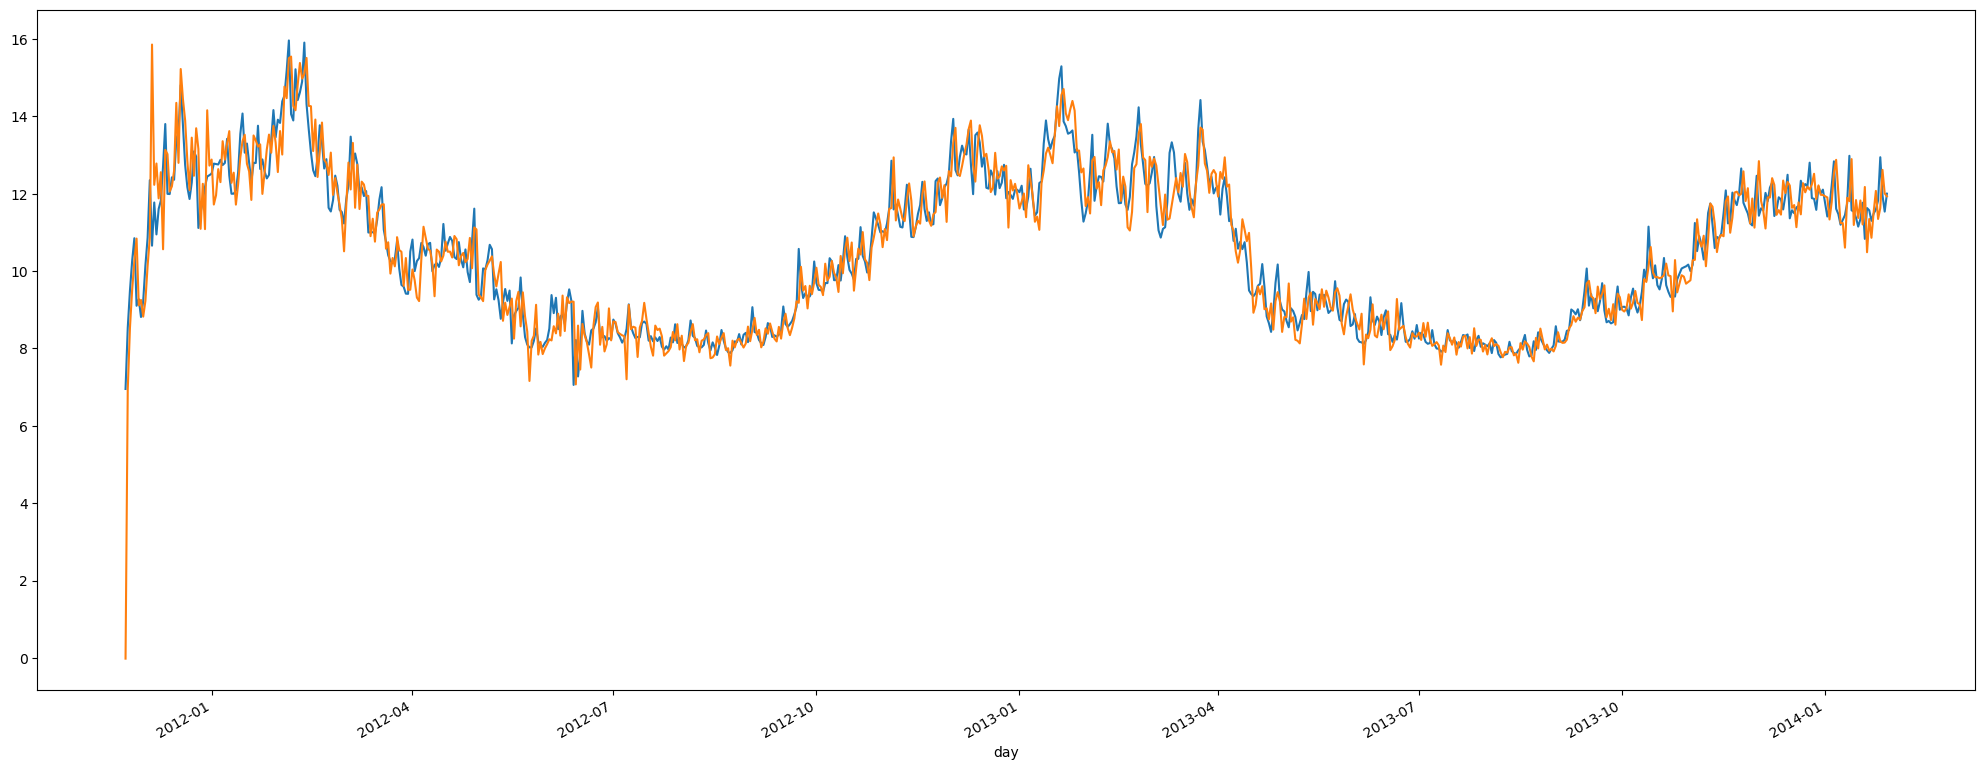

In [119]:
train['avg_energy'].plot(figsize=(25,10))
results.fittedvalues.plot()
plt.show()

In [120]:
predict = results.get_forecast(steps=len(test), exog=sm.add_constant(test[['weather_cluster', 'holiday_index']]))
test['predicted'] = predict.predicted_mean.values
test.tail(5)

D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda_data\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\ABHIMAN\AppData\Local\Temp\ipykernel_404\44894597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted'] = predict.predicted_mean.values


avg_energy  weather_cluster  holiday_index  \
day                                                      
2014-02-23   11.673756                1              0   
2014-02-24   10.586235                1              0   
2014-02-25   10.476498                1              0   
2014-02-26   10.375366                5              0   
2014-02-27   10.537250                5              0   

            avg_energy seasonal difference  predicted  
day                                                    
2014-02-23                       -0.980669  11.831156  
2014-02-24                       -1.179797  11.120896  
2014-02-25                       -1.146712  11.486421  
2014-02-26                       -1.114074  11.400962  
2014-02-27                       -0.701538  11.272703

In [121]:
test['residual'] = abs(test['avg_energy'] - test['predicted'])
MAE = test['residual'].sum() / len(test)
MAPE = (abs(test['residual']) / test['avg_energy']).sum() * 100 / len(test)
print("MAE:", MAE)
print("MAPE:", MAPE)

MAE: 0.6299276583118604
MAPE: 5.595907185423193


C:\Users\ABHIMAN\AppData\Local\Temp\ipykernel_404\4281492728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['residual'] = abs(test['avg_energy'] - test['predicted'])


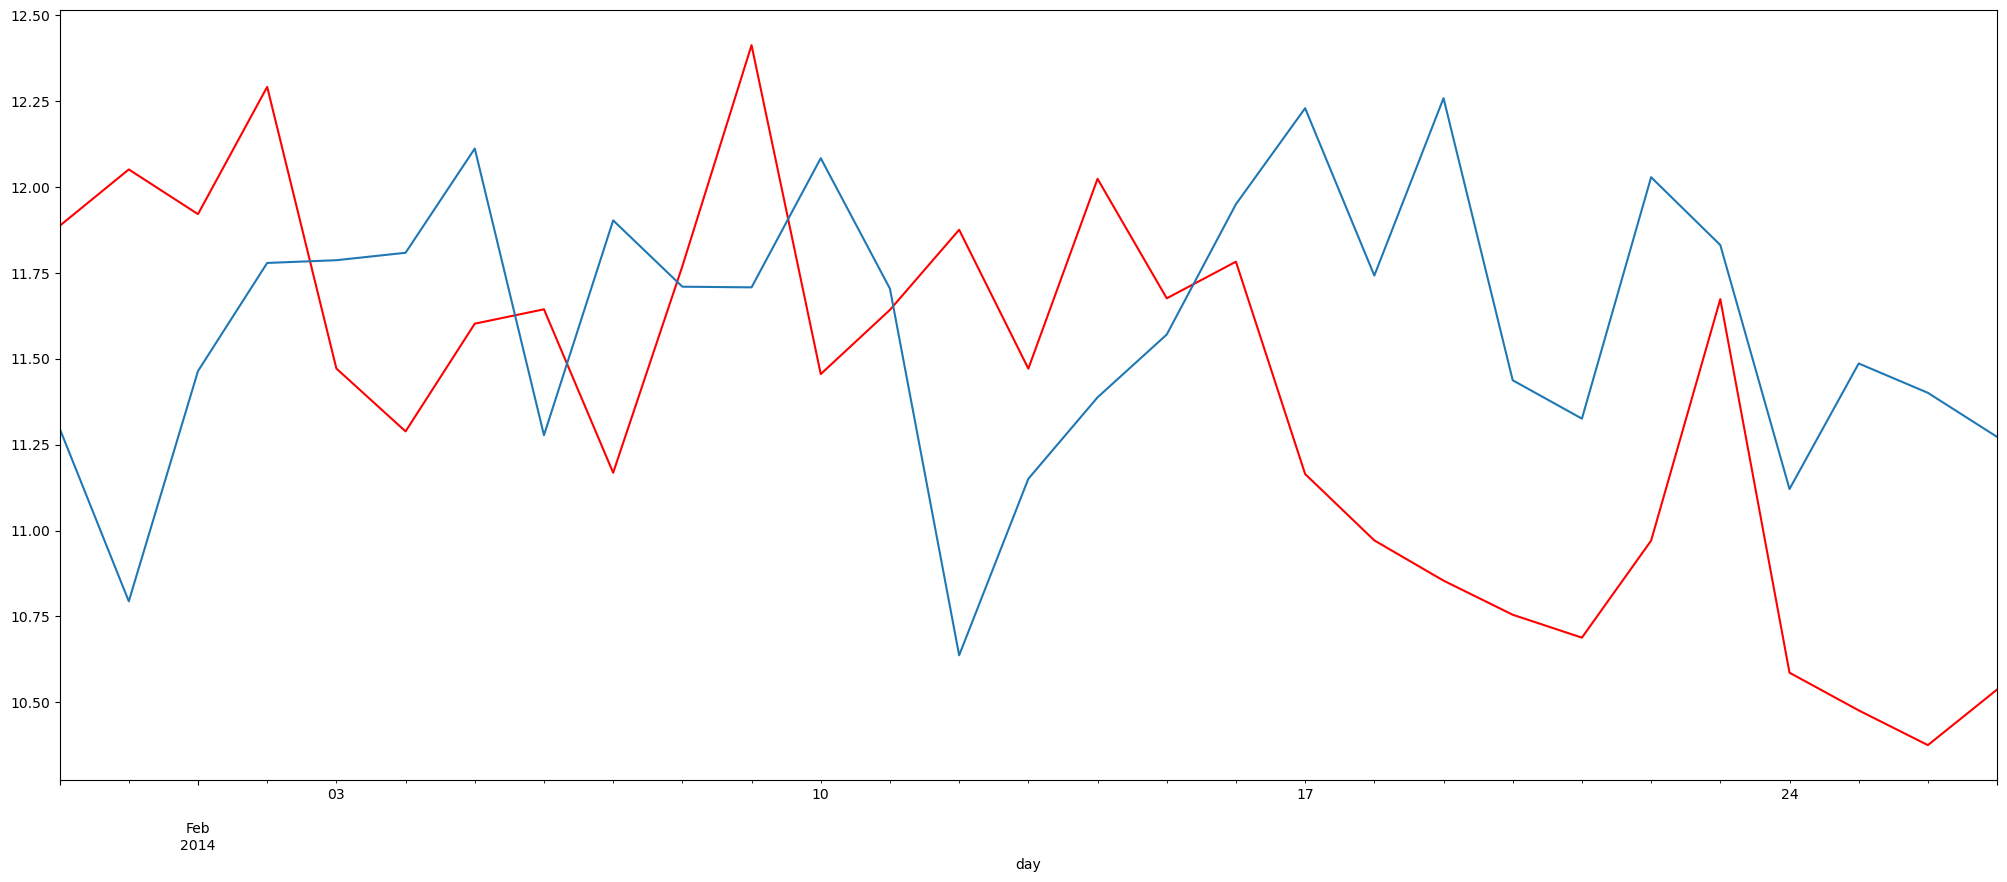

In [122]:
test['avg_energy'].plot(figsize=(25,10),color = 'red')
test['predicted'].plot()
plt.show()

<Axes: xlabel='day'>

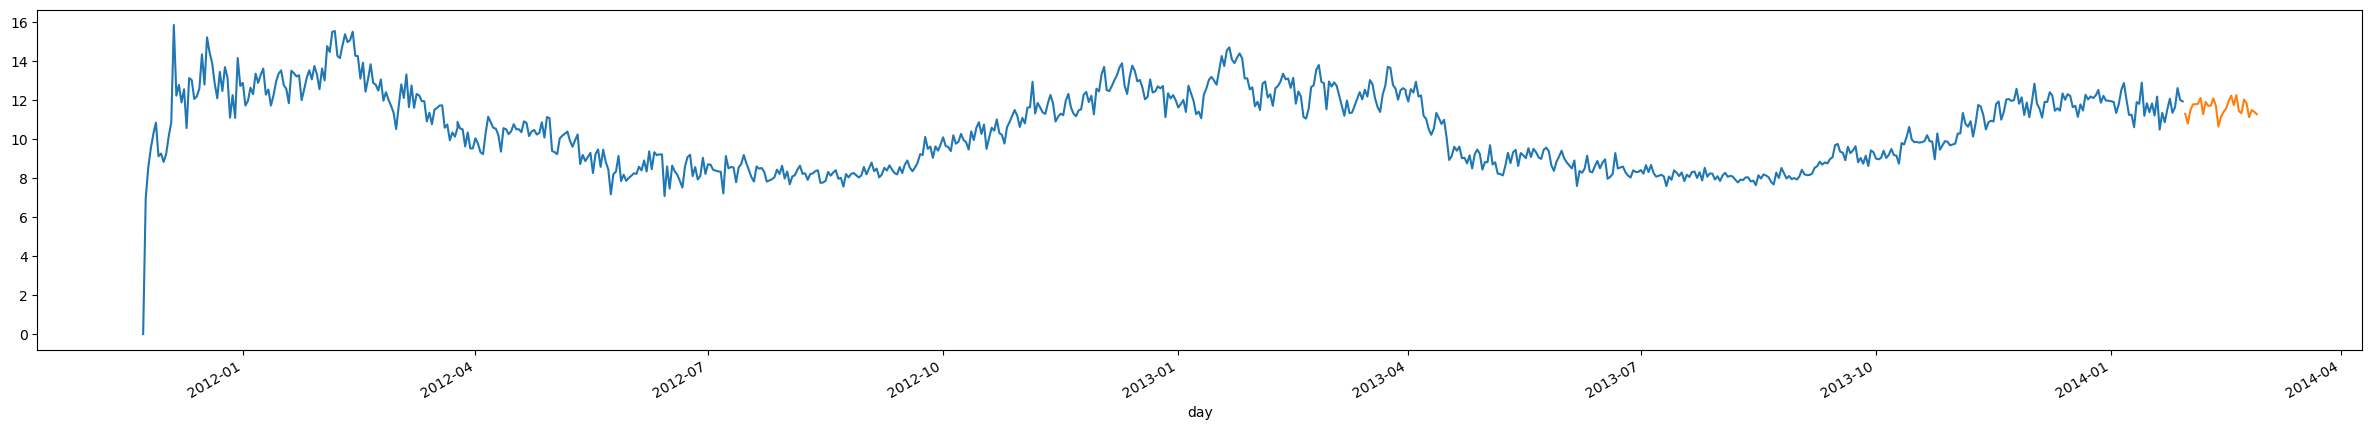

In [123]:
results.fittedvalues.plot(figsize = (30,5))
test.predicted.plot()

In [124]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['avg_energy'],test['predicted']))
print(rmse)

0.7263844456300709


In [125]:
print(test['avg_energy'])

day
2014-01-30    11.886982
2014-01-31    12.051321
2014-02-01    11.921217
2014-02-02    12.291726
2014-02-03    11.471760
2014-02-04    11.288728
2014-02-05    11.602300
2014-02-06    11.644153
2014-02-07    11.168278
2014-02-08    11.769625
2014-02-09    12.413253
2014-02-10    11.455522
2014-02-11    11.642560
2014-02-12    11.875646
2014-02-13    11.471329
2014-02-14    12.024045
2014-02-15    11.676097
2014-02-16    11.782755
2014-02-17    11.164673
2014-02-18    10.971368
2014-02-19    10.854245
2014-02-20    10.754953
2014-02-21    10.688234
2014-02-22    10.970704
2014-02-23    11.673756
2014-02-24    10.586235
2014-02-25    10.476498
2014-02-26    10.375366
2014-02-27    10.537250
Name: avg_energy, dtype: float64


In [126]:
#predicted_results = test['predicted']

In [127]:
#print(predicted_results)

In [128]:
#predicted_results.head()

In [137]:
import pickle
filename = "trainingmodel.pkl"
with open(filename, 'wb') as file:
    pickle.dump(results, file)

In [138]:
loaded_predictions = pickle.load(open(filename, 'rb'))

In [131]:
#prediction = results.predict(start = len(train),end = len(train)+len(test)-1,exog = sm.add_constant(test[['weather_cluster','holiday_index']]))
#test['loader_model'] = test.values
#test.tail(5)

In [132]:
#print(test['test'])

In [133]:
#print(type(predicted_results))

In [134]:
#import pickle
#from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResultsWrapper
#model = SARIMAX(endog=train['avg_energy'], order=(4, 1, 2), seasonal_order=(1, 1, 0, 12))
#results = model.fit()

In [135]:
#with open('sarimax_model.sav', 'wb') as file:
 #   pickle.dump(results, file)

In [136]:
#with open('sarimax_model.sav', 'rb') as file:
 #   loaded_model = pickle.load(file)